<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# Machine Learning for $t\bar{t}Z$ Opposite-sign dilepton analysis 
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to implement Machine Learning in the $t\bar{t}Z$ Opposite-sign dilepton analysis, following the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

The whole notebook takes a few hours to follow through.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

Notebooks are a perfect platform to develop Machine Learning for your work, since you'll need exactly those 3 things: code, visualisations and narrative text!

We're interested in Machine Learning because we can design an algorithm to figure out for itself how to do various analyses, potentially saving us countless human-hours of design and analysis work.

Machine Learning use within ATLAS includes: 
* particle tracking
* particle identification
* signal/background classification
* and more!

This notebook will focus on signal/background classification.

By the end of this notebook you will be able to:
1. run Boosted Decision Trees to classify signal and background
2. know some things you can change to improve your Boosted Decision Tree

Feynman diagram pictures are borrowed from our friends at https://www.particlezoo.net

<CENTER><img src="images/feynman_diagrams/ttZ_feynman.png" style="width:40%"></CENTER>

## Introduction (from Section 1)

Properties of the top quark have been explored by the
Large Hadron Collider (LHC) and previous collider experiments in great detail. 

Other properties of the top quark are
now becoming accessible, owing to the large centerof-mass energy and luminosity at the LHC.

Measurements of top-quark pairs in association with a Z boson ($t\bar{t}Z$) provide a direct probe of the
weak couplings of the top quark. These couplings
may be modified in the presence of physics beyond the
Standard Model (BSM). Measurements of the $t\bar{t}Z$ production cross sections, $\sigma_{t\bar{t}Z}$, can be used to
set constraints on the weak couplings of the top quark. 

The production of $t\bar{t}Z$ is often an important
background in searches involving final states with multiple
leptons and b-quarks. These processes also constitute an
important background in measurements of the associated
production of the Higgs boson with top quarks.

This paper presents measurements of the $t\bar{t}Z$ cross section using proton–proton (pp) collision data
at a center-of mass energy $\sqrt{s} = 13 TeV.

The final states of top-quark pairs produced in association with a
Z boson contain up to four isolated, prompt leptons. In this analysis, events with two opposite-sign
(OS) leptons are considered. The dominant backgrounds
in this channel are Z+jets and $t\bar{t}$, 

(In this paper, lepton is used to denote electron or muon, and prompt lepton is used to denote a lepton produced in a Z or W
boson decay, or in the decay of a τ-lepton which arises from a Z or W boson decay.)

## Data and simulated samples (from Section 3)

The data were collected with the ATLAS detector at a proton–proton (pp) collision
energy of 13 TeV. 

Monte Carlo (MC) simulation samples are used to model the expected signal and background distributions
in the different control, validation and signal regions described below. All samples were processed through the
same reconstruction software as used for the data. 

## Opposite-sign dilepton analysis (from Section 5A)

The OS dilepton analysis targets the $t\bar{t}Z$ process, where both top quarks decay hadronically and the Z boson
decays to a pair of leptons (electrons or muons). Events are required to have exactly two OSSF leptons.
Events with additional isolated leptons are rejected. The invariant mass of the lepton pair is required to be in the Z boson mass window, |$m_{ll} − m_Z$| < 10 GeV. The leading (subleading) lepton is required to have a
transverse momentum of at least 30 (15) GeV.

The OS dilepton analysis is affected by large backgrounds from Z+jets or $t\bar{t}$ production, both characterized
by the presence of two leptons. In order to improve the signal-to-background ratio and constrain these
backgrounds from data, three separate analysis regions are considered, depending on the number of
jets ($n_{jets}$) and number of b-tagged jets ($n_{b-tags}$): 2l-Z-5j2b, 2l-Z-6j1b and 2l-Z-6j2b. The signal region
requirements are summarized in Table 1 below.

| Variable | 2l-Z-6j1b | 2l-Z-5j2b | 2l-Z-6j2b   |
|------|------|------|------|
|   Leptons  | = 2, same flavour and opposite sign | = 2, same flavour and opposite sign | = 2, same flavour and opposite sign |
|   $m_{ll}$  | $|m_{ll} − m_Z |$ < 10 GeV | $|m_{ll} − m_Z |$ < 10 GeV | $|m_{ll} − m_Z |$ < 10 GeV |
|   $p_T$ (leading lepton)   | > 30 GeV | > 30 GeV | > 30 GeV |
|   $p_T$ (subleading lepton)   | > 15 GeV | > 15 GeV | > 15 GeV |
|   $n_{b-tags}$   | 1 | $\geq$2 | $\geq$2 |
|   $n_{jets}$   | $\geq$6 | 5 | $\geq$6 |

Table 1: Summary of the event selection requirements in the OS dilepton signal regions.

This is Table 2 of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

In signal region 2l-Z-5j2b, exactly five jets
are required, of which at least two must be b-tagged. In 2l-Z-6j1b (2l-Z-6j2b), at least six jets are required with
exactly one (at least two) being b-tagged jets.

<a id='contents'></a>

Contents: 

[Running a Jupyter notebook](#running) <br />
[To setup first time](#setupfirsttime) <br />
[To setup everytime](#setupeverytime) <br />
  [Lumi, fraction, file path](#fraction) <br />
  [Samples to process](#samples_to_process) <br />
  [Get data from files](#get_data_from_files) <br />
  [Find the good jets!](#good_jets) <br />
  [Find the good leptons!](#good_leptons) <br />
  [Let's calculate some variables](#calc_variables) <br />
  [Load data](#load_data) <br />
  [Samples to plot](#samples_SR) <br />
  [Function to plot Data/MC](#plot_data) <br />

[Boosted Decision Tree (BDT) in 6j2b Region](#BDT_6j2b) <br />
  [Training and Testing split](#BDT_6j2b_train_test_split) <br />
  [Training](#BDT_6j2b_training) <br />
  [Signal Region plot](#plot_6j2b_SR) <br />
  
[Boosted Decision Tree (BDT) in 5j2b Region](#BDT_5j2b) <br />
  [Training and Testing split](#BDT_5j2b_train_test_split) <br />
  [Training](#BDT_5j2b_training) <br />
  [Signal Region plot](#plot_5j2b_SR) <br />
  
[Boosted Decision Tree (BDT) in 6j1b Region](#BDT_6j1b) <br />
  [Training and Testing split](#BDT_6j1b_train_test_split) <br />
  [Training](#BDT_6j1b_training) <br />
  [Signal Region plot](#plot_6j1b_SR) <br />

[Control Region plots](#data_CR) <br />
  [6j2b Control Region plot](#plot_6j2b_CR) <br />
  [5j2b Control Region plot](#plot_5j2b_CR) <br />
  [6j1b Control Region plot](#plot_6j1b_CR) <br />

[Data-driven ttbar estimate](#data_driven) <br />
[Function to plot data from histograms](#plot_data_from_hist) <br />
  [6j2b Signal Region plot](#6j2b_data_driven) <br />
  [5j2b Signal Region plot](#5j2b_data_driven) <br />
  [6j1b Signal Region plot](#6j1b_data_driven) <br />
  
[BDT feature importances](#BDT_feature_importances) <br />
  
[Going further](#going_further) <br />

<a id='running'></a>

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click Cell -> Run All.

To propagate a change you've made to a piece of code, click Cell -> Run All Below.

You can also run a single code cell, by using the keyboard shortcut Shift+Enter.

[Back to contents](#contents)

<a id='setupfirsttime'></a>

## First time setup on your computer (no need on mybinder)
This first cell only needs to be run the first time you open this notebook on your computer. 

If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

If you open on mybinder, you don't need to run this cell.

In [ ]:
import yaml
import subprocess
import sys

# Path to your binder/environment.yml file
environment_file = "../../binder/environment.yml"

# Packages you want to install
required_packages = ['scikit-learn', 'pandas', 'uproot3', 'numpy', 'matplotlib']

# Load the environment.yml file
with open(environment_file, 'r') as file:
    environment_data = yaml.safe_load(file)

# Extract dependencies
dependencies = environment_data.get('dependencies', [])

# Create a list to hold the packages with versions
install_packages = []

# Find the versions for the required packages
for dep in dependencies:
    # Check if the dependency is a string (package name)
    if isinstance(dep, str):
        for package in required_packages:
            if dep.startswith(package):
                install_packages.append(dep)

# Install packages using pip
if install_packages:
    print(f"Installing packages: {install_packages}")
    subprocess.run([sys.executable, "-m", "pip", "install", "--upgrade", "--user"] + install_packages)
else:
    print("No matching packages found in environment.yml.")

[Back to contents](#contents)

<a id='setupeverytime'></a>

## To setup everytime
Cell -> Run All Below

to be done every time you re-open this notebook.

We're going to be using a number of tools to help us:
* uproot: lets us read .root files typically used in particle physics into data formats used in Machine Learning
* pandas: lets us store data as dataframes, a format widely used in Machine Learning
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations

In [2]:
import pandas as pd # to store data as dataframes
import numpy as np # for numerical calculations such as histogramming
import uproot3 # to read .root files as dataframes
import matplotlib.pyplot as plt # for plotting
from matplotlib.lines import Line2D # for dashed line in legend
from matplotlib.ticker import AutoMinorLocator,MaxNLocator # for minor ticks and forcing integer tick labels

import infofile # local file containing cross-sections and sum of weights

<a id='fraction'></a>

## Lumi, fraction, file path

General definitions of fraction of data used, where to access the input files.

The notebook will run quicker if you download the input files to your computer, rather than reading them through the web. 

1. download by clicking https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/
2. Make a folder called exactly2lep inside notebooks-collection-opendata/13-TeV-examples/uproot_python/
3. Unzip the downloaded file in "exactly2lep"
4. Uncomment tuple_path = "exactly2lep/"
5. Comment out tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/"

In [3]:
#lumi = 0.5 # 0.5 fb-1 for data_A
#lumi = 1.9 # 1.9 fb-1 for data_B
#lumi = 2.9 # 2.9 fb-1 for data_C
#lumi = 4.7 # 4.7 fb-1 for data_D
#lumi = 9.5 # 9.5 fb-1 for data_B+C+D
lumi = 10 # 10 fb-1 for data_A+B+C+D

fraction = 1 # fraction of data to use, increase this for better results
MC_to_data_ratio = 1 # fraction of simulated data to use, increase this for better results
                                                                                                                                  
#tuple_path = "exactly2lep/" # local 
tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/" # web address

[Back to contents](#contents)

<a id='samples_to_process'></a>

## Samples to process

In this notebook we only process the background samples that have a significant contribution. You can add in the uncommneted background samples later if you wish.

In [4]:
samples = {

    'data': {
        'list' : [
                  'data_A', # period A from data16
                  'data_B', # period B from data16
                  'data_C', # period C from data16
                  'data_D' # period D from data16
                 ] 
    },
    
    r'$t\bar{t}Z$' : { # ttZ(->ee) and ttZ(->μμ) signal (associated production of a top-quark pair with one vector boson)
        'list' : [
                  'ttee',
                  'ttmumu'
                 ]
    },

    r'$t\bar{t}$' : { # ttbar semileptonic / all-leptonic
        'list' : ['ttbar_lep']
    },
    
    'Z' : { # Z+jets (Events containing Z bosons with associated jets) 
        'list' : [
                  'Zmumu_PTV0_70_CVetoBVeto', # Z->μμ + jets with 0 < pT(Z) < 70 GeV whilst vetoing c and b-jets
                  'Zmumu_PTV0_70_CFilterBVeto', # Z->μμ + jets with 0 < pT(Z) < 70 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zmumu_PTV0_70_BFilter', # Z->μμ + jets with 0 < pT(Z) < 70 GeV and a requirement for b-jets
                  'Zmumu_PTV70_140_CVetoBVeto', # Z->μμ + jets with 70 < pT(Z) < 140 GeV whilst vetoing c and b-jets
                  'Zmumu_PTV70_140_CFilterBVeto', # Z->μμ + jets with 70 < pT(Z) < 140 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zmumu_PTV70_140_BFilter', # Z->μμ + jets with 70 < pT(Z) < 140 GeV and a requirement for b-jets
                  'Zmumu_PTV140_280_CVetoBVeto', # Z->μμ + jets with 140 < pT(Z) < 280 GeV whilst vetoing c and b-jets
                  'Zmumu_PTV140_280_CFilterBVeto', # Z->μμ + jets with 140 < pT(Z) < 280 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zmumu_PTV140_280_BFilter', # Z->μμ + jets with 140 < pT(Z) < 280 GeV and a requirement for b-jets
                  'Zmumu_PTV280_500_CVetoBVeto', # Z->μμ + jets with 280 < pT(Z) < 500 GeV whilst vetoing c and b-jets
                  'Zmumu_PTV280_500_CFilterBVeto', # Z->μμ + jets with 280 < pT(Z) < 500 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zmumu_PTV280_500_BFilter', # Z->μμ + jets with 280 < pT(Z) < 500 GeV and a requirement for b-jets
                  'Zmumu_PTV500_1000', # Z->μμ + jets, with 500 < pT(Z) < 1000 GeV 
                  'Zmumu_PTV1000_E_CMS', # Z->μμ + jets with 1000 GeV < pT(Z) < centre-of-mass energy
                  'Zee_PTV0_70_CVetoBVeto', # Z->ee + jets with 0 < pT(Z) < 70 GeV whilst vetoing c and b-jets
                  'Zee_PTV0_70_CFilterBVeto', # Z->ee + jets with 0 < pT(Z) < 70 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zee_PTV0_70_BFilter', # Z->ee + jets with 0 < pT(Z) < 70 GeV and a requirement for b-jets
                  'Zee_PTV70_140_CVetoBVeto', # Z->ee + jets with 70 < pT(Z) < 140 GeV whilst vetoing c and b-jets
                  'Zee_PTV70_140_CFilterBVeto', # Z->ee + jets with 70 < pT(Z) < 140 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zee_PTV70_140_BFilter', # Z->ee + jets with 70 < pT(Z) < 140 GeV and a requirement for b-jets
                  'Zee_PTV140_280_CVetoBVeto', # Z->ee + jets with 140 < pT(Z) < 280 GeV whilst vetoing c and b-jets
                  'Zee_PTV140_280_CFilterBVeto', # Z->ee + jets with 140 < pT(Z) < 280 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zee_PTV140_280_BFilter', # Z->ee + jets with 140 < pT(Z) < 280 GeV and a requirement for b-jets
                  'Zee_PTV280_500_CVetoBVeto', # Z->μμ + jets with 280 < pT(Z) < 500 GeV whilst vetoing c and b-jets
                  'Zee_PTV280_500_CFilterBVeto', # Z->ee + jets with 280 < pT(Z) < 500 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Zee_PTV280_500_BFilter', # Z->ee + jets with 280 < pT(Z) < 500 GeV and a requirement for b-jets 
                  'Zee_PTV500_1000', # Z->ee + jets with 500 < pT(Z) < 1000 GeV
                  'Zee_PTV1000_E_CMS', # Z->ee + jets with 1000 GeV < pT(Z) < centre-of-mass energy
                  ]
    },                                                                                                                                                                                                                                                                                                                                                                                  

    'Other' : { # background with at least 2 prompt leptons, other than Z+jets and ttbar                                                                                                                                                                                
        'list' : [
                  'ZqqZll', # Z(->qq)Z(->ll)
                  'single_top_wtchan', # Wt
                  'single_antitop_wtchan', # Wt
                  'lllv', # W(->lv)Z(->ll)
                  'ttW',
                  'llll', # ZZ->llll
                  'llvv', # ZZ->llvv and WW->lvlv
                  'Ztautau_PTV0_70_CVetoBVeto', # Z->ττ + jets with 0 < pT(Z) < 70 GeV whilst vetoing c and b-jets
                  'Ztautau_PTV0_70_CFilterBVeto', # Z->ττ + jets with 0 < pT(Z) < 70 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Ztautau_PTV0_70_BFilter', # Z->ττ + jets with 0 < pT(Z) < 70 GeV and a requirement for b-jets
                  'Ztautau_PTV70_140_CVetoBVeto', # Z->μμ + jets with 70 < pT(Z) < 140 GeV whilst vetoing c and b-jets
                  'Ztautau_PTV70_140_CFilterBVeto', # Z->ττ + jets with 70 < pT(Z) < 140 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Ztautau_PTV70_140_BFilter', # Z->ττ + jets with 70 < pT(Z) < 140 GeV and a requirement for b-jets
                  'Ztautau_PTV140_280_CVetoBVeto', # Z->μμ + jets with 140 < pT(Z) < 280 GeV whilst vetoing c and b-jets
                  'Ztautau_PTV140_280_CFilterBVeto', # Z->ττ + jets with 140 < pT(Z) < 280 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Ztautau_PTV140_280_BFilter', # Z->ττ + jets with 140 < pT(Z) < 280 GeV and a requirement for b-jets
                  'Ztautau_PTV280_500_CVetoBVeto', # Z->μμ + jets with 280 < pT(Z) < 500 GeV whilst vetoing c and b-jets
                  'Ztautau_PTV280_500_CFilterBVeto', # Z->ττ + jets with 280 < pT(Z) < 500 GeV and a requirement for c-jets, whilst vetoing b-jets
                  'Ztautau_PTV280_500_BFilter', # Z->ττ + jets with 280 < pT(Z) < 500 GeV and a requirement for b-jets
                  'Ztautau_PTV500_1000', # Z->ττ + jets with 500 < pT(Z) < 1000 GeV
                  'Ztautau_PTV1000_E_CMS' # Z->ττ + jets with 1000 GeV < pT(Z) < centre-of-mass energy
                 ]                                                                                                                                                                   
    },                                                                                                                                                                                           
    
}

[Back to contents](#contents)

<a id='get_data_from_files'></a>

## Get data from files

define function to get data from files

The datasets used in this notebook have already been filtered to include exactly 2 leptons per event, so that processing is quicker.

In [5]:
def get_data_from_files(samples):

    data = {} # define empty dictionary to hold dataframes
    for s in samples: # loop over samples
        print('Processing '+s+' samples') # print which sample
        frames = [] # define empty list to hold data
        for val in samples[s]['list']: # loop over each file
            if s == 'data': prefix = "Data/" # Data prefix
            else: prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"." # MC prefix
            fileString = tuple_path+prefix+val+".exactly2lep.root" # file name to open
            temp = read_file(fileString,val) # call the function read_file defined below
            if 'data' in val: # processing data file
                print('\t\tnumber of events ',len(temp)) # print total number of events for file
            #else: # processing Monte Carlo simulation file
            #    print('\t\tsum of weights ',sum(temp['totalWeight'])) # print total weight for file
                
            frames.append(temp) # append dataframe returned from read_file to list of dataframes
        data[s] = pd.concat(frames) # dictionary entry is concatenated dataframes
    
    return data # return dictionary of dataframes


[Back to contents](#contents)

define function to calculate weight of MC event

paper: "Simulated events were corrected so that the object
identification, reconstruction and trigger efficiencies, energy scales and energy resolutions match those
determined from data control samples."

In [6]:
def get_xsec_weight(sample): 
    info = infofile.infos[sample] # get infofile containing cross-sections, sums of weights, dataset IDs
    return (lumi*1000*info["xsec"]/info["sumw"])/MC_to_data_ratio #*1000 to go from fb-1 to pb-1

<a id='calc_weight'></a>

In [7]:
def calc_weight(xsec_weight,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,
                scaleFactor_MUON, scaleFactor_LepTRIGGER
                , scaleFactor_BTAG # uncomment this to get better Data vs MC match
               ):
    return xsec_weight*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER#*scaleFactor_BTAG

[Back to contents](#contents)

<a id='good_jets'></a>

## Find the good jets!

define functions to find jets passing some minimum requirements

In [8]:
def find_good_jet_indices(jet_pt,jet_jvt,
                         jet_eta # uncomment this when you want to impose stricter requirements on jets
                         ): # get indices of good jets
    good_jets = [] # list to hold whether jets are good
    for i in range(len(jet_pt)): # loop over jets
        if jet_pt[i]>25000: # paper: "Jets are accepted if they fulfill the requirements pT > 25 GeV"
            # paper: jets with pT < 60 GeV and |η| < 2.4 are required to satisfy pileup rejection criteria (JVT)
            #if jet_pt[i]<60000: # extra requirements for pt < 60 GeV and |η|<2.4
            if jet_pt[i]<60000 and abs(jet_eta[i])<2.4: # extra requirements for pt < 60 GeV and |η|<2.4
                if jet_jvt[i]<0.59: 
                    good_jets.append(0) # if jvt<0.59, this isn't a good jet
                    continue # move onto next jet
            good_jets.append(1) # append good jet if gets here
            continue # move onto next jet
        good_jets.append(0) # if pt<25000, this isn't a good jet
        
    string_ints = [str(i) for i in good_jets] # Convert each integer to a string
    str_of_ints = "".join(string_ints) # Combine each string
    return str_of_ints # return list of whether jets are good

# calculate number of good jets
def calc_goodjet_n(good_jets): # jet indices
    return good_jets.count('1') # count number of 1 in good jets list

# selection on number of good jets
def select_good_jet_n(good_jets):
    return good_jets.count('1')<5 # throw away if fewer than 5 good jets

define functions to calculate number of b-jets

In [9]:
# calculate number of (good) b-jets
def calc_bjet_n(jet_MV2c10,good_jets): # MV2c10 scores and jet indices
    bjet_n = 0 # start counter for number of b-jets
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    for i in good_jets_indices: # loop over good jets
        if jet_MV2c10[i]>0.6459: # for 77% b-tag efficiency from https://cds.cern.ch/record/2160731/files/ATL-PHYS-PUB-2016-012.pdf Table 2                           
            bjet_n+=1 # increment the counter for the number of b-jets
    return bjet_n # return the number of b-jets

# selection on number of b-jets
def select_bjet_n(bjet_n):
    # throw away if fewer than 1 b-jets
    return bjet_n<1

[Back to contents](#contents)

<a id='good_leptons'></a>

## Find the good leptons!

define function to calculate dilepton invariant mass (mll)

In [10]:
def calc_inv_mass_pair(pt_1,eta_1,phi_1,E_1,pt_2,eta_2,phi_2,E_2): # pt,eta,phi,energy of 2 objects
    px_1 = pt_1*np.cos(phi_1) # x-momentum of object 1
    py_1 = pt_1*np.sin(phi_1) # y-momentum of object 1
    pz_1 = pt_1*np.sinh(eta_1) # z-momentum of object 1
    px_2 = pt_2*np.cos(phi_2) # x-momentum of object 2
    py_2 = pt_2*np.sin(phi_2) # y-momentum of object 2
    pz_2 = pt_2*np.sinh(eta_2) # z-momentum of object 2
    sumpx = px_1 + px_2 # x-momentum of combined system
    sumpy = py_1 + py_2 # y-momentum of combined system
    sumpz = pz_1 + pz_2 # z-momentum of combined system
    sump = np.sqrt(sumpx**2 + sumpy**2 + sumpz**2) # total momentum of combined system
    sumE = E_1 + E_2 # total energy of combined system
    return np.sqrt(sumE**2 - sump**2)/1000 # /1000 to go from MeV to GeV

# calculate dilepton invariant mass
def calc_mll(lep_pt,lep_eta,lep_phi,lep_E): # lepton pt,eta,phi,energy
    return calc_inv_mass_pair(lep_pt[0],lep_eta[0],lep_phi[0],lep_E[0],lep_pt[1],lep_eta[1],lep_phi[1],lep_E[1])

define lepton selections for Opposite-sign dilepton analysis. Information is taken from Section 4. Object Reconstruction of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

<a id='select_leptons'></a>

In [11]:
# selection on nth good lepton
def select_leptons(mll, lep_ptcone30, lep_pt, lep_type, lep_etcone20, lep_tracksigd0pvunbiased, lep_eta, 
                   lep_charge
                   ,lep_z0 # uncomment this to apply stricter requirements
                  ): # variables for good lepton
    
    # paper: "invariant mass of the lepton pair is required to be in the Z boson mass window, |mll − mZ| < 10 GeV"
    if (mll < 81.12) or (mll > 101.12): return True
    
    # paper: "total sum of [...] transverse momenta in a surrounding cone [...] is required to be less than 6% of [...] pT"
    if lep_ptcone30[0]>0.06*lep_pt[0] or lep_ptcone30[1]>0.06*lep_pt[1]: return True # bad lepton if ptcone>6%pt
    
    # paper: "sum of [...] transverse energies [...] within a cone of size ∆Rη = 0.2 around any electron [...] is required to be less than 6% of [...] pT"
    if lep_type[0]==11 and lep_etcone20[0]>0.06*lep_pt[0]: return True # bad electron if etcone>6%pt
    if lep_type[1]==11 and lep_etcone20[1]>0.06*lep_pt[1]: return True # bad electron if etcone>6%pt
    
    # paper: "significance of [...] d0 is required to satisfy |d0|/σ(d0) < 5 for electrons and |d0|/σ(d0) < 3 for muons"
    if lep_type[0]==13 and lep_tracksigd0pvunbiased[0]>3: return True # bad muon if σ(d0)>3
    if lep_type[1]==13 and lep_tracksigd0pvunbiased[1]>3: return True # bad muon if σ(d0)>3
    if lep_tracksigd0pvunbiased[0]>5 or lep_tracksigd0pvunbiased[1]>5: return True # bad electron if σ(d0)>5
    
    # paper Table 2: pT (leading lepton) > 30 GeV and pT (subleading lepton) > 15 GeV
    if lep_pt[0]<30000 or lep_pt[1]<15000: return True # minimum pt requirments on leptons
    
    # paper: "Muons are required to have |η| < 2.5"
    if abs(lep_eta[0])>2.5 or abs(lep_eta[1])>2.5: return True # bad lepton if |η|>2.5
    
    # paper: "Opposite-sign"
    if lep_charge[0]+lep_charge[1]!=0: return True # throw away when charges don't add to 0
    
    # paper: "longitudinal impact parameter [...], z0, is required to satisfy |z0 sinθ| < 0.5 mm"
    theta_i = 2*np.arctan(np.exp(-lep_eta[0])) # calculate theta angle
    if abs(lep_z0[0]*np.sin(theta_i))>0.5: return True # bad lepton if z0*sinθ > 0.5mm
    theta_i = 2*np.arctan(np.exp(-lep_eta[1])) # calculate theta angle
    if abs(lep_z0[1]*np.sin(theta_i))>0.5: return True # bad lepton if z0*sinθ > 0.5mm
    
    return False # don't throw away event if gets here


[Back to contents](#contents)

<a id='calc_variables'></a>

## Let's calculate some variables!

define function to return which channel. 121 is ee, 169 is mumu, 143 is emu.

In [12]:
# return number to represent which channel                                                                                                                             
def calc_channel(lep_type):
    return lep_type[0]*lep_type[1] 


define functions to calculate invariant mass, ∆R and pT

In [13]:
def calc_inv_mass_triplet(pt_1,eta_1,phi_1,E_1,pt_2,eta_2,phi_2,E_2,pt_3,eta_3,phi_3,E_3): # pt,eta,phi,energy of 3 objects
    px_1 = pt_1*np.cos(phi_1) # x-momentum of object 1
    py_1 = pt_1*np.sin(phi_1) # y-momentum of object 1
    pz_1 = pt_1*np.sinh(eta_1) # z-momentum of object 1
    px_2 = pt_2*np.cos(phi_2) # x-momentum of object 2
    py_2 = pt_2*np.sin(phi_2) # y-momentum of object 2
    pz_2 = pt_2*np.sinh(eta_2) # z-momentum of object 2
    px_3 = pt_3*np.cos(phi_3) # x-momentum of object 3
    py_3 = pt_3*np.sin(phi_3) # y-momentum of object 3
    pz_3 = pt_3*np.sinh(eta_3) # z-momentum of object 3
    sumpx = px_1 + px_2 + px_3 # x-momentum of combined system
    sumpy = py_1 + py_2 + py_3 # y-momentum of combined system
    sumpz = pz_1 + pz_2 + pz_3 # z-momentum of combined system
    sump = np.sqrt(sumpx**2 + sumpy**2 + sumpz**2) # total momentum of combined system
    sumE = E_1 + E_2 + E_3 # total energy of combined system
    return np.sqrt(sumE**2 - sump**2)/1000 # /1000 to go from MeV to GeV

def calc_delta_R(eta_1,phi_1,eta_2,phi_2): # eta,phi of 2 objects
    delta_eta = eta_1-eta_2 # Δη between the 2 objects
    delta_phi = phi_1-phi_2 # Δϕ between the 2 objects
    if delta_phi >= np.pi: delta_phi -= 2*np.pi # use π periodicity to get number between -π and π
    elif delta_phi < -np.pi: delta_phi += 2*np.pi # use π periodicity to get number between -π and π
    return np.sqrt(delta_eta**2 + delta_phi**2) # return ∆R for this object


def calc_pT_triplet(pt_1,eta_1,phi_1,pt_2,eta_2,phi_2,pt_3,eta_3,phi_3): # pt,eta,phi of 3 objects
    px_1 = pt_1*np.cos(phi_1) # x-momentum of object 1
    py_1 = pt_1*np.sin(phi_1) # y-momentum of object 1
    px_2 = pt_2*np.cos(phi_2) # x-momentum of object 2
    py_2 = pt_2*np.sin(phi_2) # y-momentum of object 2
    px_3 = pt_3*np.cos(phi_3) # x-momentum of object 3
    py_3 = pt_3*np.sin(phi_3) # y-momentum of object 3
    pz_3 = pt_3*np.sinh(eta_3) # z-momentum of object 3
    sumpx = px_1 + px_2 + px_3 # x-momentum of combined system
    sumpy = py_1 + py_2 + py_3 # y-momentum of combined system
    return np.sqrt(sumpx**2 + sumpy**2)/1000 # /1000 to go from MeV to GeV

[Back to contents](#contents)

define functions to calculate variables for 2b6j BDT

In [14]:
# functin to calculate pt of the lepton pair
def calc_ptll(lep_pt,lep_phi): # pt of dilepton system
    px_0 = lep_pt[0]*np.cos(lep_phi[0]) # x-momentum of lep_0
    py_0 = lep_pt[0]*np.sin(lep_phi[0]) # y-momentum of lep_0
    px_1 = lep_pt[1]*np.cos(lep_phi[1]) # x-momentum of lep_1
    py_1 = lep_pt[1]*np.sin(lep_phi[1]) # y-momentum of lep_1
    sumpx = px_0 + px_1 # x-momentum of dilepton system
    sumpy = py_0 + py_1 # y-momentum of dilepton system
    return np.sqrt(sumpx**2 + sumpy**2)/1000 #/1000 to go from MeV to GeV  

# function to calculate pt of ith jet
def calc_pti_jet(jet_pt,good_jets,index): # jet pt and index
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    if index<len(good_jets_indices) and good_jets_indices[index]<len(jet_pt): 
        return jet_pt[good_jets_indices[index]]/1000 # /1000 to go from MeV to GeV
    else: return 0 # 0 if there's no jet at this index
    
# function to calculate ∆R between the two leptons
def calc_dRll(lep_eta, lep_phi): # Δη and Δϕ between leptons
    return calc_delta_R(lep_eta[0], lep_phi[0], lep_eta[1], lep_phi[1]) # ∆R between the 2 leptons

# function to calculate number of jet pairs with mass within a window of 30 GeV around 85 GeV (~Z/W mass)
def calc_NJetPairsZMass(jet_pt,jet_eta,jet_phi,jet_E, # jet pt,eta,phi,energy
                        good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    NJetPairsZMass = 0 # start counter for number of jet pairs within a window of 30 GeV around 85 GeV
    for i in good_jets_indices[:8]: # loop over good jets
        for j in good_jets_indices[i+1:8]: # loop over remaining good jets
            # call function calc_inv_mass_pair defined above to get jet-pair invariant mass
            Vmass = calc_inv_mass_pair(jet_pt[i],jet_eta[i],jet_phi[i],jet_E[i],
                                       jet_pt[j],jet_eta[j],jet_phi[j],jet_E[j])
            if abs(Vmass-85)<30: # within 30 GeV of 85 GeV
                NJetPairsZMass += 1 # increment counter for number of jet pairs within a window of 30 GeV around 85 GeV
    return NJetPairsZMass # return number of jet pairs within a window of 30 GeV around 85 GeV

# function to calculate number of top-quark candidates
def calc_Nmbjj_top(jet_pt,jet_eta,jet_phi,jet_E,jet_MV2c10, # pt,eta,phi,energy,MV2c10
                   good_jets): # good jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    Nmbjj_top = 0 # start counter for number of top-quark candidates
    for i in good_jets_indices[:8]: # loop over good jets
        for j in good_jets_indices[i+1:8]: # loop over remaining good jets
            for k in good_jets_indices[j+1:8]: # loop over remaining good jets
                # number of b-jets in this 3-jet system
                n_bjets = int(jet_MV2c10[i]>0.6459)+int(jet_MV2c10[j]>0.6459)+int(jet_MV2c10[k]>0.6459)
                if n_bjets==1: # only 1 b-jet for top quark candidate
                    if jet_MV2c10[i]>0.6459: # if i is the b-jet
                        b = i # assign index i to b
                        j1 = j # assign index j to j1
                        j2 = k # assing index k to j2
                    elif jet_MV2c10[j]>0.6459: # if j is is the b-jet
                        b = j # assign index j to b
                        j1 = i # assign index i to j1
                        j2 = k # assign index k to j2
                    else: # if k is the b-jet
                        b = k # assign index k to b
                        j1 = i # assign index i to j1
                        j2 = j # assign index j to j2
                    px_b = jet_pt[b]*np.cos(jet_phi[b]) # x-momentum of the b-jet
                    py_b = jet_pt[b]*np.sin(jet_phi[b]) # y-momentum of the b-jet
                    pz_b = jet_pt[b]*np.sinh(jet_eta[b]) # z-momentum of the b-jet
                    px_j1 = jet_pt[j1]*np.cos(jet_phi[j1]) # x-momentum of (non-b) jet 1
                    py_j1 = jet_pt[j1]*np.sin(jet_phi[j1]) # y-momentum of (non-b) jet 1
                    pz_j1 = jet_pt[j1]*np.sinh(jet_eta[j1]) # z-momentum of (non-b) jet 1
                    px_j2 = jet_pt[j2]*np.cos(jet_phi[j2]) # x-momentum of (non-b) jet 2
                    py_j2 = jet_pt[j2]*np.sin(jet_phi[j2]) # y-momentum of (non-b) jet 2
                    pz_j2 = jet_pt[j2]*np.sinh(jet_eta[j2]) # z-momentum of (non-b) jet 2
                    sumpx_t = px_b + px_j1 + px_j2 # x-momentum of 3-jet system
                    sumpy_t = py_b + py_j1 + py_j2 # y-momentum of 3-jet system
                    sumpz_t = pz_b + pz_j1 + pz_j2 # z-momentum of 3-jet system
                    sump_t = np.sqrt(sumpz_t**2 + sumpx_t**2 + sumpy_t**2) # total momentum of 3-jet system
                    sumE_t = jet_E[i] + jet_E[j] + jet_E[k] # total energy of 3-jet system
                    M_bjj = np.sqrt(sumE_t**2 - sump_t**2)/1000 # mass of 3-jet system
                    sumpx_W = px_j1 + px_j2 # x-momentum of W candidate
                    sumpy_W = py_j1 + py_j2 # y-momentum of W candidate
                    sumpz_W = pz_j1 + pz_j2 # z-momentum of W candidate
                    sump_W = np.sqrt(sumpz_W**2 + sumpx_W**2 + sumpy_W**2) # total momentum of W candidate
                    sumE_W = jet_E[j1] + jet_E[j2] # total energy of W candidate
                    M_W = np.sqrt(sumE_W**2 - sump_W**2)/1000 # mass of W candidate
                    if abs(M_bjj - 172.5)<15 and abs(M_W - 80)<15: # within 15 GeV of top and W mass windows
                        Nmbjj_top += 1 # increment counter for number of top-quark candidates
    return Nmbjj_top # return number of top-quark candidates

# function to calculate mass of the combination between any two jets with the smallest ∆R
def calc_MjjMindR(jet_pt,jet_eta,jet_phi,jet_E, # jet pt,eta,phi,energy
                  good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    MindR = 99 # dummy value for smallest ∆R
    for jet_i in good_jets_indices[:8]: # loop over good jets
        for jet_j in good_jets_indices[jet_i+1:8]: # loop over remaining good jets
            dR = calc_delta_R(jet_eta[jet_i],jet_phi[jet_i],jet_eta[jet_j],jet_eta[jet_j]) # calculate ∆R
            if dR < MindR: # if this ∆R is smaller than the smallest ∆R found previously
                MindR = dR # set this ∆R to be the smallest ∆R
                i1r = jet_i # i1r is the index of the 1st jet to be considered later
                i2r = jet_j # i2r is the index of the 2nd jet to be considered later
    # use function calc_inv_mass_pair defined above to get the jet-jet invariant mass
    MjjMindR = calc_inv_mass_pair(jet_pt[i1r],jet_eta[i1r],jet_phi[i1r],jet_E[i1r],
                                  jet_pt[i2r],jet_eta[i2r],jet_phi[i2r],jet_E[i2r])
    return MjjMindR # return mass of the combination between any two jets with the smallest ∆R

# function to calculate mass of the two jets with the highest b-tag weight
def calc_MbbPtOrd(jet_pt,jet_eta,jet_phi,jet_E,jet_MV2c10, # jet pt,eta,phi,energy,MV2c10
                  good_jets):
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    MV2c10_scores = {} # dictionary to hold indices and MV2c10 scores
    for i in good_jets_indices[:8]: # loop over good jets
        MV2c10_scores[i] = jet_MV2c10[i] # dictionary entry of index and MV2c10 score
    max_MV2c10_index = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with maximum MV2c10 score
    del MV2c10_scores[max_MV2c10_index] # delete jet with maximum MV2c10 score from dictionary
    second_MV2c10_index = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with second MV2c10 score
    # use function calc_inv_mass_pair defined above to get mass of the two jets with the highest b-tag weight
    return calc_inv_mass_pair(jet_pt[max_MV2c10_index],jet_eta[max_MV2c10_index],jet_phi[max_MV2c10_index],
                             jet_E[max_MV2c10_index],jet_pt[second_MV2c10_index],jet_eta[second_MV2c10_index],
                             jet_phi[second_MV2c10_index],jet_E[second_MV2c10_index])

# function to calculate jet centrality (scalar sum of pT divided by sum of E for all jets)
def calc_CentrJet(jet_pt,jet_E, # jet pt and energy
                  good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    sum_pt = 0 # start counter for pt of all jets
    sum_E = 0 # start counter for energy of all jets
    for i in good_jets_indices[:8]: # loop over good jets
        sum_pt += jet_pt[i] # add single jet pt to sum of jet pt
        sum_E += jet_E[i] # add single jet energy to sum of jet energy
    return sum_pt/sum_E # ratio of total pt to total energy

# function to calculate average ∆R for all jet pairs
def calc_dRjjave_jet(jet_eta,jet_phi, # jet eta,phi
                     good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    delta_R = [] # list to hold ∆R between all jet pairs
    for i in good_jets_indices[:8]: # loop over good jets
        for j in good_jets_indices[i+1:8]: # loop over remaining good jets
            delta_R.append(calc_delta_R(jet_eta[i],jet_phi[i],jet_eta[j],jet_phi[j])) # append ∆R for this jet pair to list
    return sum(delta_R)/len(delta_R) # average ∆R of all jet pairs

# function to calculate maximum mass between a lepton and the tagged jet with the smallest ∆R
def calc_MaxMMindRlepb(lep_pt,lep_eta,lep_phi,lep_E,jet_pt,jet_eta,jet_phi,jet_E,jet_MV2c10, # pt,eta,phi,E,MV2c10
                       good_jets):
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    # what if the b-jet isn't one of the first 8 good jets? Use the jet within the first 8 with highes MV2c10 score
    if len(good_jets)>8 and jet_MV2c10[good_jets_indices[0]]<0.6459 and jet_MV2c10[good_jets_indices[1]]<0.6459 and jet_MV2c10[good_jets_indices[2]]<0.6459 and jet_MV2c10[good_jets_indices[3]]<0.6459 and jet_MV2c10[good_jets_indices[4]]<0.6459 and jet_MV2c10[good_jets_indices[5]]<0.6459 and jet_MV2c10[good_jets_indices[6]]<0.6459 and jet_MV2c10[good_jets_indices[7]]<0.6459:
        MV2c10_scores = {} # dictionary to hold indices and btagging scores
        for i in good_jets_indices[:8]: # loop over good jets                                                                                  
            MV2c10_scores[i] = jet_MV2c10[i] # dictionary entry of index and btagging score                                                      
        ijetr = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with maximum btagging score
    MaxMMindRlepb = 0 # dummy value for maximum mass between a lepton and the tagged jet with the smallest ∆R
    for lep_i in [0,1]: # loop over leptons
        MindRlepb = 99 # dummy value for smallest ∆R
        for jet_j in good_jets_indices[:8]: # loop over good jets
            if jet_MV2c10[jet_j]>0.6459: # for 77% b-tag efficiency from https://cds.cern.ch/record/2160731/files/ATL-PHYS-PUB-2016-012.pdf Table 2
                dRlepb = calc_delta_R(lep_eta[lep_i],lep_phi[lep_i],jet_eta[jet_j],jet_phi[jet_j]) # get ∆R
                if dRlepb < MindRlepb: # if this ∆R is smaller than the smallest ∆R found previously for this lep
                    MindRlepb = dRlepb # set this ∆R to be the minimum ∆R for this lepton
                    ijetr = jet_j # ijetr is the index of the jet to be considered later
        # use function calc_inv_mass_pair to get the lep-b pair invariant mass
        MMindRlepb = calc_inv_mass_pair(lep_pt[lep_i],lep_eta[lep_i],lep_phi[lep_i],lep_E[lep_i],
                                                    jet_pt[ijetr],jet_eta[ijetr],jet_phi[ijetr],jet_E[ijetr])
        if MMindRlepb > MaxMMindRlepb: # if this lep-b pair mass is bigger than the biggest previous
            MaxMMindRlepb = MMindRlepb # set this lep-b pair mass to be the maximum mass
    return MaxMMindRlepb # return maximum mass between a lepton and the tagged jet with the smallest ∆R

# function to calculate First Fox-Wolfram moment
def calc_H1(lep_pt,lep_eta,lep_phi,lep_E,jet_pt,jet_eta,jet_phi,jet_E, # lepton and jet pt,eta,phi,energy
            good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    E_viss = 0 # start counter for visible energy in the event
    H1 = 0 # start counter for H1
    for lep_i in range(2): # loop over leptons
        E_viss += lep_E[lep_i] # add energy of leptons to visible energy counter
    for jet_i in range(len(jet_pt)): # loop over all jets (not just good jets)
        E_viss += jet_E[jet_i] # add energy of jets to visible energy counter
    for lep_i in range(2): # loop over leptons
        px_i = lep_pt[lep_i]*np.cos(lep_phi[lep_i]) # x-momentum of lepton i
        py_i = lep_pt[lep_i]*np.sin(lep_phi[lep_i]) # y-momentum of lepton i
        pz_i = lep_pt[lep_i]*np.sinh(lep_eta[lep_i]) # z-momentum of lepton i
        for lep_j in range(lep_i,2): # loop over leptons
            px_j = lep_pt[lep_j]*np.cos(lep_phi[lep_j]) # x-momentum of lepton j
            py_j = lep_pt[lep_j]*np.sin(lep_phi[lep_j]) # y-momentum of lepton j
            pz_j = lep_pt[lep_j]*np.sinh(lep_eta[lep_j]) # z-momentum of lepton j
            numerator = px_i*px_j + py_i*py_j + pz_i*pz_j # dot product of lepton momenta
            H1 += numerator/(E_viss**2) # H1 calculation for this lepton pairing
    for jet_i in good_jets_indices[:8]: # loop over good jets
        px_i = jet_pt[jet_i]*np.cos(jet_phi[jet_i]) # x-momentum of jet i
        py_i = jet_pt[jet_i]*np.sin(jet_phi[jet_i]) # y-momentum of jet i
        pz_i = jet_pt[jet_i]*np.sinh(jet_eta[jet_i]) # z-momentum of jet i
        for jet_j in good_jets_indices[jet_i:]: # loop over good jets
            px_j = jet_pt[jet_j]*np.cos(jet_phi[jet_j]) # x-momentum of jet j
            py_j = jet_pt[jet_j]*np.sin(jet_phi[jet_j]) # y-momentum of jet j
            pz_j = jet_pt[jet_j]*np.sinh(jet_eta[jet_j]) # z-momentum of jet j
            numerator = px_i*px_j + py_i*py_j + pz_i*pz_j # dot product of jet-pair momenta
            H1 += numerator/(E_viss**2) # H1 calculation for this jet pairing
    for lep_i in range(2): # loop over leptons
        px_i = lep_pt[lep_i]*np.cos(lep_phi[lep_i]) # x-momentum of lepton
        py_i = lep_pt[lep_i]*np.sin(lep_phi[lep_i]) # y-momentum of lepton
        pz_i = lep_pt[lep_i]*np.sinh(lep_eta[lep_i]) # z-momentum of lepton
        for jet_j in good_jets_indices[:8]: # loop over jets
            px_j = jet_pt[jet_j]*np.cos(jet_phi[jet_j]) # x-momentum of jet
            py_j = jet_pt[jet_j]*np.sin(jet_phi[jet_j]) # y-momentum of jet
            pz_j = jet_pt[jet_j]*np.sinh(jet_eta[jet_j]) # z-momentum of jet
            numerator = px_i*px_j + py_i*py_j + pz_i*pz_j # dot product of lepton-jet pair momenta
            H1 += numerator/(E_viss**2) # H1 calcuation for this lepton-jet pairing
    return H1 # return H1 

# function to calculate sum of jet pT , up to 6 jets
def calc_HT_jet6(jet_pt, # jet pt
                 good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    sum_pt = 0 # start counter for total jet pt
    for i in good_jets_indices[:6]: # loop over good jets, up to 6 jets 
        sum_pt += jet_pt[i] # add individual jet pt to total jet pt
    return sum_pt/1000 # /1000 to go from MeV to GeV

# function to calculate η of dilepton system
def calc_eta_ll(lep_pt,lep_eta,lep_phi): # lepton pt,eta,phi
    px_0 = lep_pt[0]*np.cos(lep_phi[0]) # x-momentum of lep_0
    py_0 = lep_pt[0]*np.sin(lep_phi[0]) # y-momentum of lep_0
    pz_0 = lep_pt[0]*np.sinh(lep_eta[0]) # z-momentum of lep_0
    px_1 = lep_pt[1]*np.cos(lep_phi[1]) # x-momentum of lep_1
    py_1 = lep_pt[1]*np.sin(lep_phi[1]) # y-momentum of lep_1
    pz_1 = lep_pt[1]*np.sinh(lep_eta[1]) # z-momentum of lep_1
    sumpx = px_0 + px_1 # x-momentum of dilepton system
    sumpy = py_0 + py_1 # y-momentum of dilepton system
    sumpz = pz_0 + pz_1 # z-momentum of dilepton system
    sump = np.sqrt(sumpz**2 + sumpx**2 + sumpy**2) # total momentum of dilepton system
    return np.arctanh(sumpz/sump) # arctan between z-momentum and total momentum

# function to calculate sum of the two closest 2 jet invariant masses from from jjj1 and jjj2, divided by 2
def calc_MWavg(jet_pt,jet_eta,jet_phi,jet_E,jet_MV2c10, # jet pt,eta,phi,energy,MV2c10
               good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    if len(good_jets_indices)<6: return 0 # don't calculate this for 5j event
    b1_i = 0 # index of first jet
    dR1 = 99 # dummy value for min ∆R between 1st b-jet and another jet
    for i in good_jets_indices[:8]: # loop over good jets
        if i==b1_i: continue # if this jet is the 1st b-jet, move onto the next jet
        delta_R = calc_delta_R(jet_eta[b1_i],jet_phi[b1_i],jet_eta[i],jet_phi[i]) # ∆R between the two jets
        if delta_R < dR1: # if this ∆R is smaller than the smallest ∆R found previously for the 1st b-jet
            dR1 = delta_R # set this ∆R as the smallest ∆R for the 1st b-jet
            jj1_1_i = i # assign index jj1_1_i to the jet closest to the 1st b-jet
    dR2 = 99 # dummy value for second smallest ∆R between the 1st b-jet and another jet
    for i in good_jets_indices[:8]: # loop over good jets
        if i in [b1_i,jj1_1_i]: continue # if this jet is the 1st b-jet or the jet closest to the 1st b-jet, move on
        delta_R = calc_delta_R(jet_eta[b1_i],jet_phi[b1_i],jet_eta[i],jet_phi[i]) # ∆R between the two jets
        if delta_R < dR2: # if this ∆R is smaller than the second smallest ∆R found previously for the 1st b-jet
            dR2 = delta_R # set this ∆R as the second smallest ∆R for the 1st b-jet
            jj1_2_i = i # assign index jj1_2_i to the jet second closest to the 1st b-jet
    for i in good_jets_indices[:8]: # looking for the second "b-jet"
        if i in [b1_i,jj1_1_i,jj1_2_i]: continue # if this jet is in the 3-jet system of the 1st b-jet, move on
        b2_i = i # assign index i to the next highest pt jet
        break # finish this for loop
    dR1 = 99 # dummy value for min ∆R between 2nd b-jet and another jet
    for i in good_jets_indices[:8]: # loop over good jets 
        if i in [b1_i,jj1_1_i,jj1_2_i,b2_i]: continue # if i is part of 1st b-jet system or is the 2nd b-jet, move on
        delta_R = calc_delta_R(jet_eta[b2_i],jet_phi[b2_i],jet_eta[i],jet_phi[i]) # ∆R between the two jets
        if delta_R < dR1: # if this ∆R is smaller than the smallest ∆R found previously for the 2nd b-jet
            dR1 = delta_R # set this ∆R as the smallest ∆R for the 2nd b-jet
            jj2_1_i = i # assign index jj2_1_i to the jet closest to the 2nd b-jet (if not in 1st b-jet system)
    dR2 = 99 # dummy value for second smallest ∆R between the 2nd b-jet and another jet
    for i in good_jets_indices[:8]: # loop over good jets
        if i in [b1_i,jj1_1_i,jj1_2_i,b2_i,jj2_1_i]: continue # if this jet has been used previously, move on
        delta_R = calc_delta_R(jet_eta[b2_i],jet_phi[b2_i],jet_eta[i],jet_phi[i]) # ∆R between the two jets
        if delta_R < dR2: # if this ∆R is smaller than the second smallest ∆R found previously for the 2nd b-jet
            dR2 = delta_R # set this ∆R as the second smallest ∆R for the 2nd b-jet
            jj2_2_i = i # assign index jj2_2_i to the jet second closest to the 2nd b-jet
    M1 = [] # list to hold masses of W candidates from 1st b-jet
    # inv mass between 1st b-jet and the jet closest to it
    M1.append(calc_inv_mass_pair(jet_pt[b1_i],jet_eta[b1_i],jet_phi[b1_i],jet_E[b1_i],
                                 jet_pt[jj1_1_i],jet_eta[jj1_1_i],jet_phi[jj1_1_i],jet_E[jj1_1_i]))
    # inv mass between 1st b-jet and the jet second closest to it
    M1.append(calc_inv_mass_pair(jet_pt[b1_i],jet_eta[b1_i],jet_phi[b1_i],jet_E[b1_i],
                                 jet_pt[jj1_2_i],jet_eta[jj1_2_i],jet_phi[jj1_2_i],jet_E[jj1_2_i]))
    # inv mass between the two jets closest to the 1st b-jet
    M1.append(calc_inv_mass_pair(jet_pt[jj1_1_i],jet_eta[jj1_1_i],jet_phi[jj1_1_i],jet_E[jj1_1_i],
                                 jet_pt[jj1_2_i],jet_eta[jj1_2_i],jet_phi[jj1_2_i],jet_E[jj1_2_i]))
    M2 = [] # list to hold masses of W candidates from 2nd b-jet
    # inv mass between 2nd b-jet and the jet closest to it
    M2.append(calc_inv_mass_pair(jet_pt[b2_i],jet_eta[b2_i],jet_phi[b2_i],jet_E[b2_i],
                                 jet_pt[jj2_1_i],jet_eta[jj2_1_i],jet_phi[jj2_1_i],jet_E[jj2_1_i]))
    # inv mass between 2nd b-jet and the jet second closest to it
    M2.append(calc_inv_mass_pair(jet_pt[b2_i],jet_eta[b2_i],jet_phi[b2_i],jet_E[b2_i],
                                 jet_pt[jj2_2_i],jet_eta[jj2_2_i],jet_phi[jj2_2_i],jet_E[jj2_2_i]))
    # inv mass between the two jets closest to the 2nd b-jet
    M2.append(calc_inv_mass_pair(jet_pt[jj2_1_i],jet_eta[jj2_1_i],jet_phi[jj2_1_i],jet_E[jj2_1_i],
                                 jet_pt[jj2_2_i],jet_eta[jj2_2_i],jet_phi[jj2_2_i],jet_E[jj2_2_i]))
    difM = 1000000 # dummy value for the difference between the masses of the 1st and 2nd W candidates
    for i in range(3): # loop over [0,1,2]
        for j in range(3): # loop over [0,1,2]
            difM12 = abs(M1[i]-M2[j]) # get absolute difference between W candidate 1 and W candidate 2
            if difM12<difM: # if this difference is smaller than the smallest difference found previously
                difM=difM12 # set this difference as the smallest difference between the masses of W candidates
                MW=(M1[i]+M2[j])/2 # mass average of W candidate 1 and W candidate 2
    return MW # return average W candidate mass. divide by 1000 to go from MeV to GeV

# function to calculate ∆R between the two jets with the highest b-tagging weight in the event
def calc_dRbb(jet_eta,jet_phi,jet_MV2c10, # jet eta,phi,MV2c10
              good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    MV2c10_scores = {} # dictionary to hold indices and MV2c10 scores
    for i in good_jets_indices[:8]: # loop over good jets
        MV2c10_scores[i] = jet_MV2c10[i] # dictionary entry of index and MV2c10 score
    max_MV2c10_index = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with maximum MV2c10 score
    del MV2c10_scores[max_MV2c10_index] # delete jet with maximum MV2c10 score from dictionary
    second_MV2c10_index = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with second MV2c10 score
    return calc_delta_R(jet_eta[max_MV2c10_index],jet_phi[max_MV2c10_index],jet_eta[second_MV2c10_index],
                        jet_phi[second_MV2c10_index]) # ∆R between the 2 b-jets

# function to calculate pT of the first b-jet (ordered according to the pT)
def calc_pT1b(jet_pt,jet_MV2c10, # jet pt,MV2c10
              good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    for i in good_jets_indices[:8]: # loop over good jets
        if jet_MV2c10[i]>0.6459: #77% WP to decide if it's a b-jet
            return jet_pt[i]/1000 # /1000 to go from MeV to GeV
    # what if the b-jet isn't one of the first 8 good jets? Use the jet within the first 8 with highes MV2c10 score
    if len(good_jets)>8 and jet_MV2c10[good_jets_indices[0]]<0.6459 and jet_MV2c10[good_jets_indices[1]]<0.6459 and jet_MV2c10[good_jets_indices[2]]<0.6459 and jet_MV2c10[good_jets_indices[3]]<0.6459 and jet_MV2c10[good_jets_indices[4]]<0.6459 and jet_MV2c10[good_jets_indices[5]]<0.6459 and jet_MV2c10[good_jets_indices[6]]<0.6459 and jet_MV2c10[good_jets_indices[7]]<0.6459:
        MV2c10_scores = {} # dictionary to hold indices and btagging scores
        for i in good_jets_indices[:8]: # loop over good jets
            MV2c10_scores[i] = jet_MV2c10[i] # dictionary entry of index and btagging score
        max_MV2c10_index = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with maximum btagging score
        return jet_pt[max_MV2c10_index]/1000 # /1000 to go from MeV to GeV

[Back to contents](#contents)

define function to calculate variables for BDT in 2b5j or 1b6j signal regions

In [15]:
# function to calculate mass of the two untagged jets with the highest pT
def calc_MuuPtOrd(jet_pt,jet_eta,jet_phi,jet_E,jet_MV2c10, # jet pt,eta,phi,energy,MV2c10
                  good_jets): # jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    MV2c10_scores = {} # dictionary to hold indices and MV2c10 scores
    for i in good_jets_indices: # loop over good jets
        MV2c10_scores[i] = jet_MV2c10[i] # dictionary entry of index and MV2c10 score
    max_MV2c10_index = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with maximum MV2c10 score
    del MV2c10_scores[max_MV2c10_index] # delete jet with maximum MV2c10 score from dictionary
    second_MV2c10_index = max(MV2c10_scores, key=MV2c10_scores.get) # get index of jet with second MV2c10 score
    for i in good_jets_indices: # loop over good jets
        if i==max_MV2c10_index or i==second_MV2c10_index: continue # if this jet is a b-jet, move onto next jet
        for j in good_jets_indices[i+1:]: # loop over remaining good jets
            if j==max_MV2c10_index or j==second_MV2c10_index: continue # if j is a b-jet, move onto next jet
            # use function calc_inv_mass_pair defined above to get mass of jet pair
            return calc_inv_mass_pair(jet_pt[i],jet_eta[i],jet_phi[i],jet_E[i],
                                      jet_pt[j],jet_eta[j],jet_phi[j],jet_E[j])

define function to calculate number of heavy-flavour jets

In [16]:
def calc_HF_n(jet_trueflav,good_jets): # jet true flavours and jet indices
    good_jets_indices = [i for i,b in enumerate(good_jets) if b=='1'] # get the good jets
    HF_n = 0 # start counter for number of heavy-flavour jets
    for jet_i in good_jets_indices: # loop over good jets
        if jet_trueflav[jet_i]==4 or jet_trueflav[jet_i]==5: # c=4, b=5
            HF_n += 1 # increment counter for number of heavy-flavour jets
    return HF_n # return number of heavy-flavour jets

[Back to contents](#contents)

<a id='load_data'></a>

## Can we process the data yet?!

define function to read files

In [17]:
def read_file(path,sample):
    print("\tProcessing: "+sample) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot3.open(path)["mini"] # open the tree called mini
    numevents = uproot3.numentries(path, "mini") # number of events
    if 'data' in sample: fraction_MC=fraction # process fraction*1 of measured data
    else: fraction_MC=fraction*MC_to_data_ratio # process fraction*MC_to_data_ratio of simulated data
    entrystop=numevents*fraction_MC # stop after fraction of events we want to process
    branches = ['lep_pt','lep_eta','lep_phi','lep_E','lep_charge','lep_type','lep_ptcone30',
                'lep_etcone20','lep_tracksigd0pvunbiased','met_et',
                'jet_pt','jet_eta','jet_phi','jet_E','jet_jvt','jet_MV2c10'
                ,'lep_z0' # uncomment this for stricter lepton requirements
               ]
    if 'data' not in sample: 
        xsec_weight = get_xsec_weight(sample) #  get cross-section weight
        branches.extend(['mcWeight','scaleFactor_PILEUP','scaleFactor_ELE',
                         'scaleFactor_MUON','scaleFactor_LepTRIGGER'
                         ,'scaleFactor_BTAG' # uncomment this for better Data vs MC match
                        ])
        if 'Zmumu' in sample or 'Zee' in sample:
            branches.extend(['jet_trueflav'])
            
    for data in tree.iterate(branches, 
                             outputtype=pd.DataFrame, # choose output type as pandas DataFrame
                             entrystop=entrystop): # process up to numevents*fraction
        
        nIn = len(data.index) # number of events in this batch
        #print('\t\t initial \t\t\t\t',nIn) 
        
        # get index of 0th good jet
        data['good_jets'] = np.vectorize(find_good_jet_indices)(data.jet_pt, data.jet_jvt 
                                                                ,data.jet_eta # uncomment this for stricter requirements
                                                               )
        
        data['goodjet_n'] = np.vectorize(calc_goodjet_n)(data.good_jets)

        # select on number of good jets
        fail = data[ np.vectorize(select_good_jet_n)(data.good_jets) ].index # get events that fail the selection
        data.drop(fail,inplace=True) # drop the events that have fewer than 5 jets
        if len(data.index)==0: continue # move onto next batch if no events left
        #print('\t\t at least 6 jets \t\t\t',len(data.index))
        
        # calculate number of b-jets at 77% Working Point using function calc_bjet_n defined above
        data['bjet_n'] = np.vectorize(calc_bjet_n)(data.jet_MV2c10, data.good_jets)
        
        # select on number of b-jets
        fail = data[ np.vectorize(select_bjet_n)(data.bjet_n) ].index # get events that fail this selection
        data.drop(fail,inplace=True) # drop the events with fewer than 1 b-jets
        if len(data.index)==0: continue # move onto next batch if no events left
        #print('\t\t at least 2 b-jets \t\t\t',len(data.index))
        
        # calculation of 2-lepton invariant mass                                                                                                                                      
        data['mll'] = np.vectorize(calc_mll)(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)
        
        # select on whether leptons are good                                                                                                                                                    
        fail = data[ np.vectorize(select_leptons)(data.mll, data.lep_ptcone30, data.lep_pt, data.lep_type,
                                                  data.lep_etcone20, data.lep_tracksigd0pvunbiased, 
                                                  data.lep_eta, data.lep_charge
                                                  ,data.lep_z0 # uncomment this for stricter requirements
                                                 ) ].index # get events that fail this selection
        data.drop(fail, inplace=True) # drop events where leptons aren't good
        if len(data.index)==0: continue # move onto next batch if no events left
        #print('\t\t leptons are good \t\t\t',len(data.index))
        
        data['channel'] = np.vectorize(calc_channel)(data.lep_type) # ee, mm or em

        data['ptll'] = np.vectorize(calc_ptll)(data.lep_pt, data.lep_phi) # pt of dilepton system
        data['pt4_jet'] = np.vectorize(calc_pti_jet)(data.jet_pt, data.good_jets, 3) # pt of 4th jet
        data['pt6_jet'] = np.vectorize(calc_pti_jet)(data.jet_pt, data.good_jets, 5) # pt of 6th jet
        data['dRll'] = np.vectorize(calc_dRll)(data.lep_eta, data.lep_phi) # ∆R between the two leptons
        
        # get number of jet pairs with mass within a window of 30 GeV around 85 GeV (~Z/W mass)
        data['NJetPairsZMass'] = np.vectorize(calc_NJetPairsZMass)(data.jet_pt, data.jet_eta, data.jet_phi,
                                                                   data.jet_E, data.good_jets)
        
        # get mass of the combination between any two jets with the smallest ∆R
        data['MjjMindR'] = np.vectorize(calc_MjjMindR)(data.jet_pt, data.jet_eta, data.jet_phi, data.jet_E,
                                                       data.good_jets)
        
        # get number of top-quark candidates
        data['Nmbjj_top'] = np.vectorize(calc_Nmbjj_top)(data.jet_pt, data.jet_eta, data.jet_phi, data.jet_E,
                                                         data.jet_MV2c10, data.good_jets)
        
        # get mass of the two jets with the highest b-tag weight
        data['MbbPtOrd'] = np.vectorize(calc_MbbPtOrd)(data.jet_pt, data.jet_eta, data.jet_phi, data.jet_E,
                                                       data.jet_MV2c10, data.good_jets)
        
        # get jet centrality (scalar sum of pT divided by sum of E for all jets)
        data['CentrJet'] = np.vectorize(calc_CentrJet)(data.jet_pt, data.jet_E, data.good_jets)
        
        # get average ∆R for all jet pairs
        data['dRjjave_jet'] = np.vectorize(calc_dRjjave_jet)(data.jet_eta, data.jet_phi, data.good_jets)
        
        # get maximum mass between a lepton and the tagged jet with the smallest ∆R
        data['MaxMMindRlepb'] = np.vectorize(calc_MaxMMindRlepb)(data.lep_pt, data.lep_eta, data.lep_phi,
                                                                 data.lep_E, data.jet_pt, data.jet_eta, 
                                                                 data.jet_phi, data.jet_E, data.jet_MV2c10,
                                                                 data.good_jets)
        # get sum of jet pT , up to 6 jets
        data['HT_jet6'] = np.vectorize(calc_HT_jet6)(data.jet_pt, data.good_jets)
        
        data['eta_ll'] = np.vectorize(calc_eta_ll)(data.lep_pt, data.lep_eta, data.lep_phi) # η of dilepton system
        
        # get sum of the two closest 2 jet invariant masses from from jjj1 and jjj2, divided by 2
        data['MWavg'] = np.vectorize(calc_MWavg)(data.jet_pt, data.jet_eta, data.jet_phi, data.jet_E, 
                                                 data.jet_MV2c10, data.good_jets)
        
        # get ∆R between two jets with the highest b-tagging weight in the event
        data['dRbb'] = np.vectorize(calc_dRbb)(data.jet_eta, data.jet_phi, data.jet_MV2c10, data.good_jets)
        
        # get pT of the first b-jet (ordered according to the pT)
        data['pT1b'] = np.vectorize(calc_pT1b)(data.jet_pt, data.jet_MV2c10, data.good_jets)
        
        # get H1 (First Fox-Wolfram moment)
        data['H1'] = np.vectorize(calc_H1)(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E,
                                           data.jet_pt, data.jet_eta, data.jet_phi, data.jet_E,
                                           data.good_jets)
        
        data['pt5_jet'] = np.vectorize(calc_pti_jet)(data.jet_pt, data.good_jets, 4) # pt of 5th jet
        
        # get mass of the two untagged jets with the highest pT
        data['MuuPtOrd'] = np.vectorize(calc_MuuPtOrd)(data.jet_pt, data.jet_eta, data.jet_phi, data.jet_E,
                                                       data.jet_MV2c10, data.good_jets)
        
        if 'data' not in sample: # if MC
            # calculate total weight of event from all individual weights
            data['totalWeight'] = np.vectorize(calc_weight)(xsec_weight,data.mcWeight,data.scaleFactor_PILEUP,
                                                            data.scaleFactor_ELE,data.scaleFactor_MUON,
                                                            data.scaleFactor_LepTRIGGER
                                                            ,data.scaleFactor_BTAG
                                                           )
            data.drop(['mcWeight','scaleFactor_PILEUP','scaleFactor_ELE',
                       'scaleFactor_MUON','scaleFactor_LepTRIGGER'
                       ,'scaleFactor_BTAG' # uncomment this for better Data vs MC match
                      ], axis=1, inplace=True)
            
            if 'Zmumu' in sample or 'Zee' in sample:
                # calculate number of heavy-flavour jets at truth level
                data['HF_n'] = np.vectorize(calc_HF_n)(data.jet_trueflav,data.good_jets)
                data.drop(['jet_trueflav'], axis=1, inplace=True)

        # drop variables that don't need to be saved to csv
        data.drop(['good_jets','lep_pt','lep_eta','lep_phi','lep_E','lep_charge','lep_type','lep_ptcone30',
                   'lep_etcone20','lep_tracksigd0pvunbiased','met_et','jet_pt','jet_eta','jet_phi',
                   'jet_E','jet_jvt','jet_MV2c10'
                   ,'lep_z0'
                  ], 
                  axis=1, inplace=True)
        
        nOut = len(data.index) # number of events passing selections in this batch
        data_all = pd.concat([data_all, data], ignore_index=True) # append dataframe from this batch to the dataframe for the whole sample
        

    return data_all # return dataframe containing events passing all selections


[Back to contents](#contents)

This is where the processing happens

In [ ]:
data_dict = get_data_from_files(samples) # process all files

[Back to contents](#contents)

<a id='samples_SR'></a>

## Samples to plot

Define dictionary of samples and colours to use for plotting

In [ ]:
samples_SR = {

    'data': {
        'list' : ['data_A','data_B','data_C','data_D']
    },
    
    'Other' : {
        'color' : "#79b278" # purple                                                                                                                                                                   
    },  
    
    'Z + 0 HF' : {
        'color' : "#ce0000" # light green                                                                                                                                                              
    },
    
    'Z + 1 HF' : {
        'color' : "#ffcccc" # middle green
    }, 
    
    'Z + 2 HF' : {
        'color' : "#ff6666" # dark green
    }, 
    
    r'$t\bar{t}$' : {
        'color' : "#f8f8f8" # almost white
    }, 
    
    r'$t\bar{t}Z$' : {
        'color' : "#00ccfd" # blue
    },                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
    
}

Regroup Z+jets into Z + 0 HF, Z + 1 HF, Z + 2 HF

paper: "The simulated Z +
jets background is split into three components, Z + 0HF,
Z + 1HF and Z + 2HF, depending on the number of
reconstructed jets which are matched to a generator-level
b- or c-hadron (heavy-flavor, or HF jets)"

In [ ]:
data_dict['Z + 0 HF'] = data_dict['Z'][data_dict['Z']['HF_n']==0] # find the events with 0 heavy-flavour partons
data_dict['Z + 1 HF'] = data_dict['Z'][data_dict['Z']['HF_n']==1] # find the events with 1 heavy-flavour parton
data_dict['Z + 2 HF'] = data_dict['Z'][data_dict['Z']['HF_n']>=2] # find the events with 2 heavy-flavour partons

[Back to contents](#contents)

<a id='plot_data'></a>

## Function to plot Data and MC

In [ ]:
def plot_data(data, samples_to_plot=samples_SR, x_variable='BDT_6j2b_output',
              region_label='2L-Z-6j2b'):
    
    # *******************
    # general definitions (shouldn't need to change)
      
    bin_edges = np.arange(start=-1, # The interval includes this value
                 stop=1+0.1, # The interval doesn't include this value
                 step=0.1 ) # Spacing between values
    bin_centres = np.arange(start=-1+0.1/2, # The interval includes this value
                        stop=1+0.1/2, # The interval doesn't include this value
                        step=0.1 ) # Spacing between values

    mc_x = [] # define list to hold the MC histogram entries
    mc_weights = [] # define list to hold the MC weights
    mc_colors = [] # define list to hold the MC bar colors
    mc_labels = [] # define list to hold the MC legend labels
    
    main_axes = plt.gca() # get current axes

    mc_stat_err_squared = np.zeros(len(bin_centres)) # define array to hold the MC statistical uncertainties
    for s in samples_to_plot: # loop over samples
        if s!='data': # if not data
            mc_x.append( data[s][x_variable] ) # append to the list of Monte Carlo histogram entries
            totalWeights = data[s]['totalWeight'] # get the totalWeight column
            mc_weights.append( totalWeights ) # append to the list of Monte Carlo weights
            mc_colors.append( samples_to_plot[s]['color'] ) # append to the list of Monte Carlo bar colors
            mc_labels.append( s ) # append to the list of Monte Carlo legend labels 
            weights_squared,_ = np.histogram(data[s][x_variable], bins=bin_edges,
                                             weights=totalWeights**2) # square the totalWeights
            mc_stat_err_squared = np.add(mc_stat_err_squared,weights_squared) # add weights_squared for s 


    # plot the Monte Carlo bars
    mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                                weights=mc_weights, stacked=True, 
                                color=mc_colors, label=mc_labels )

    mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value
    mc_x_err = np.sqrt( mc_stat_err_squared ) # statistical error on the MC bars

    # histogram the data
    data_x,_ = np.histogram(data['data'][x_variable], bins=bin_edges ) 

    # statistical error on the data
    data_x_errors = np.sqrt(data_x)

    # plot the data points
    main_axes.errorbar(x=bin_centres, 
                       y=data_x, 
                       yerr=data_x_errors,
                       fmt='ko', # 'k' means black and 'o' is for circles 
                       label='Data')

    # plot the statistical uncertainty
    main_axes.bar(bin_centres, # x
                  2*mc_x_err, # heights
                  alpha=0.5, # half transparency
                  bottom=mc_x_tot-mc_x_err, color='none', 
                  hatch="////", width=0.1, label='Stat. Unc.' )

    # set the x-limit of the main axes
    main_axes.set_xlim( left=-1, right=1 ) 

    # separation of x axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          right=True ) # draw ticks on right axis

    # x-axis label
    main_axes.set_xlabel(x_variable, fontsize=13)

    # y-axis label
    main_axes.set_ylabel('Events / 0.1')

    # force y-axis ticks to be integers
    main_axes.yaxis.set_major_locator(MaxNLocator(integer=True))

    # set y-axis limits for main axes
    main_axes.set_ylim(bottom=0,
                       top=np.amax(data_x)+np.sqrt(np.amax(data_x))*5 )

    # add minor ticks on y-axis for main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

    # Add text 'ATLAS Open Data' on plot
    plt.text(0.05, # x
             0.92, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 

    # Add text 'for education' on plot
    plt.text(0.05, # x
             0.87, # y
             'for education', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             style='italic',
             fontsize=8 ) 

    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.05, # x
             0.81, # y
             '$\sqrt{s}$=13 TeV, '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # Add a label for the analysis region
    plt.text(0.05, # x
             0.75, # y
             region_label, # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # draw the legend
    main_axes.legend(ncol=2, # number of columns
                     frameon=False ) # no box around the legend 


    

[Back to contents](#contents)

<a id='BDT_6j2b'></a>

## BDT in 6j2b region

In order to separate signal from background, boosted decision trees (BDTs) are used. The BDTs are
constructed and trained against all the contributing backgrounds, using as input 17 variables for 2l-Z-6j2b. You can see the variables used in Table 11 of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

We start by using fewer variables, you can add the other variables back in later.

Choose variables for use in BDT

In [ ]:
BDT_6j2b_inputs = ['ptll','pt4_jet','pt6_jet','dRll','NJetPairsZMass','Nmbjj_top','MjjMindR','MbbPtOrd',
                   'CentrJet','dRjjave_jet','MaxMMindRlepb','HT_jet6','eta_ll','MWavg','dRbb','pT1b'
                   ,'H1' # try add these variables first
                   #,'pt5_jet','MuuPtOrd' # maybe try add these variables later?
                  ] # variables to use in BDT

Select the data in the 6j2b Signal Region.

In [ ]:
# define function to select only events with leptons of same type, at least 6 jets and at least 2 b-tagged jets
def select_6j2b_SR(channel, goodjet_n, bjet_n):
    if channel==143: return True # throw away if emu
    if goodjet_n<6: return True # throw away if fewer than 6 jets
    if bjet_n<2: return True # throw away if fewer than 2 b-tagged jets
    return False # keep this event if it gets to this stage

In [ ]:
data_6j2b_SR = {} # define empty dict
for s in samples_SR:
    fail = data_dict[s][ np.vectorize(select_6j2b_SR)(data_dict[s]['channel'], data_dict[s]['goodjet_n'],
                                                      data_dict[s]['bjet_n']) ].index # get events that fail the selection
    data_6j2b_SR[s] = data_dict[s].drop(fail).copy()

[Back to contents](#contents)

Organise data ready for BDT

In [ ]:
# for sklearn data is usually organised                                                                                                                                           
# into one 2D array of shape (n_samples x n_features)                                                                                                                             
# containing all the data and one array of categories                                                                                                                             
# of length n_samples  

all_MC = [] # define empty list that will contain all features for the MC
all_y = [] # define empty list that will contain labels whether an event in signal or background
for s in samples_SR: # loop over the different keys in the dictionary of dataframes
    if s=='data': continue # skip data for BDT training
    all_MC.append(data_6j2b_SR[s][BDT_6j2b_inputs]) # append the MC dataframe to the list containing all MC features
    if s==r'$t\bar{t}Z$': # only signal MC should pass this
        all_y.append(np.ones(data_6j2b_SR[s].shape[0])) # signal events are labelled with 1
    else: # only background MC should pass this
        all_y.append(np.zeros(data_6j2b_SR[s].shape[0])) # background events are labelled with 0
X = np.concatenate(all_MC) # concatenate the list of MC dataframes into a single 2D array of features, called X
y = np.concatenate(all_y) # concatenate the list of lables into a single 1D array of labels, called y

[Back to contents](#contents)

<a id='BDT_6j2b_train_test_split'></a>

### The Training and Testing split (6j2b)
One of the first things to do is split your data into a training and testing set. This will split your data into train-test sets: 75%-25%. It will also shuffle entries so you will not get the first 75% of <span style="color:red">X</span> for training and the last 25% for testing. This is particularly important in cases where you load all signal events first and then the background events.

Here we split our data into two independent samples. The split is to create a training and testing set. The first will be used for training the classifier and the second to evaluate its performance.

We don't want to test on events that we used to train on, this prevents overfitting to some subset of data so the network would be good for the test data but much worse at any *new* data it sees.

In [ ]:
from sklearn.model_selection import train_test_split

# make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=492 )

[Back to contents](#contents)

<a id='BDT_6j2b_training'></a>

### Training Decision Trees (6j2b)

We'll use SciKit Learn (sklearn) in this tutorial. Other possible tools include keras and pytorch. 

After instantiating our <span style="color:red">GradientBoostingClassifier</span>, call the <span style="color:red">fit()</span> method with the training sample as an argument. This will train the tree, now we are ready to evaluate the performance on the held out testing set.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # BoostType

bdt_6j2b = GradientBoostingClassifier()
bdt_6j2b.fit(X_train, y_train) # fit BDT to training set

The <span style="color:red">fit()</span> method returns the trained classifier. When printed out all the hyper-parameters are listed.

[Back to contents](#contents)

Apply the trained BDT to all Data and MC

In [ ]:
bdt_outputs = bdt_6j2b.decision_function(X) # apply bdt to all X
min_bdt_output = min(bdt_outputs) # get minimum BDT output score
max_bdt_output = max(bdt_outputs) # get maximum BDT output score

Map the BDT decision function to the range [-1,1]

In [ ]:
for s in samples_SR: # loop over samples
    X_s = data_6j2b_SR[s][BDT_6j2b_inputs] # get the BDT input features
    bdt_output_on_X_s = bdt_6j2b.decision_function(X_s) # get decision function for this sample
    mapped_bdt_output_on_X_s = (bdt_output_on_X_s-min_bdt_output)/(max_bdt_output-min_bdt_output)*2 - 1 # map to [-1,1]
    data_6j2b_SR[s]['BDT_6j2b_output'] = mapped_bdt_output_on_X_s # save BDT output

[Back to contents](#contents)

<a id='plot_6j2b_SR'></a>

## 6j2b Signal Region plot

Use the <span style="color:red">plot_data()</span> function defined [above](#plot_data) to compare Data with MC in BDT outputs in the 6j2b Signal Region. 

The Figure below shows the BDT output distribution in the signal
region 2l-Z-6j2b.

In [ ]:
plot_data(data_6j2b_SR, samples_to_plot=samples_SR, x_variable='BDT_6j2b_output',
          region_label='2L-Z-6j2b')

Compare this with Figure 10(c) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

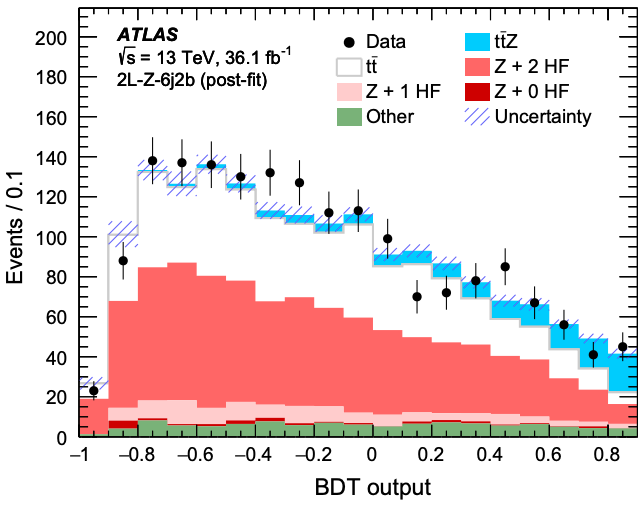

FIG. 10(c). The BDT distribution for the OS dilepton signal regions, (c) 2l-Z-6j2b. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons. The shaded band represents the total uncertainty. The last bin of each distribution contains the overflow.

[Back to contents](#contents)

<a id='BDT_5j2b'></a>

## BDT in 5j2b region

In order to separate signal from background, boosted decision trees (BDTs) are used. The BDTs are
constructed and trained against all the contributing backgrounds, using as input 14 variables for 2l-Z-5j2b. You can see the variables used in Table 11 of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

Choose variables for use in BDT

In [ ]:
BDT_5j2b_inputs = ['ptll','pt4_jet','dRll','NJetPairsZMass','MjjMindR','MbbPtOrd',
                   'CentrJet','dRjjave_jet','HT_jet6','eta_ll','dRbb'
                   ,'pt5_jet','MuuPtOrd','H1' # try adding these first
                   #,'Nmbjj_top','MaxMMindRlepb','pT1b' # maybe you could also try adding these?
                  ] # variables to use in BDT
# why can't pt6_jet, MWavg be added?

Select the data in the 5j2b Signal Region.

In [ ]:
# define function to select only events with leptons of same type, exactly 5 jets and at least 2 b-tagged jets
def select_5j2b_SR(channel, goodjet_n, bjet_n):
    if channel==143: return True # throw away if emu
    if goodjet_n!=5: return True # throw away if not 5 jets
    if bjet_n<2: return True # throw away if fewer than 2 b-tagged jets
    return False # keep this event if it gets to this stage

In [ ]:
data_5j2b_SR = {} # define empty dict
for s in samples_SR: # loop over samples to plot in Signal Regions
    fail = data_dict[s][ np.vectorize(select_5j2b_SR)(data_dict[s]['channel'], data_dict[s]['goodjet_n'],
                                                      data_dict[s]['bjet_n']) ].index # get events that fail the selection
    data_5j2b_SR[s] = data_dict[s].drop(fail).copy() # copy events that don't get dropped to a new dataframe

[Back to contents](#contents)

Organise data ready for BDT

In [ ]:
# for sklearn data is usually organised                                                                                                                                           
# into one 2D array of shape (n_samples x n_features)                                                                                                                             
# containing all the data and one array of categories                                                                                                                             
# of length n_samples  

all_MC = [] # define empty list that will contain all features for the MC
all_y = [] # define empty list that will contain labels whether an event in signal or background
for s in samples_SR: # loop over the different keys in the dictionary of dataframes
    if s=='data': continue # skip data for BDT training
    all_MC.append(data_5j2b_SR[s][BDT_5j2b_inputs]) # append the MC dataframe to the list containing all MC features
    if s==r'$t\bar{t}Z$': # only signal MC should pass this
        all_y.append(np.ones(data_5j2b_SR[s].shape[0])) # signal events are labelled with 1
    else: # only background MC should pass this
        all_y.append(np.zeros(data_5j2b_SR[s].shape[0])) # background events are labelled with 0
X = np.concatenate(all_MC) # concatenate the list of MC dataframes into a single 2D array of features, called X
y = np.concatenate(all_y) # concatenate the list of lables into a single 1D array of labels, called y

[Back to contents](#contents)

<a id='BDT_5j2b_train_test_split'></a>

### The Training and Testing split (5j2b)
One of the first things to do is split your data into a training and testing set. This will split your data into train-test sets: 75%-25%. It will also shuffle entries so you will not get the first 75% of <span style="color:red">X</span> for training and the last 25% for testing. This is particularly important in cases where you load all signal events first and then the background events.

Here we split our data into two independent samples. The split is to create a training and testing set. The first will be used for training the classifier and the second to evaluate its performance.

We don't want to test on events that we used to train on, this prevents overfitting to some subset of data so the network would be good for the test data but much worse at any *new* data it sees.

In [ ]:
from sklearn.model_selection import train_test_split

# make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=492 )

[Back to contents](#contents)

<a id='BDT_5j2b_training'></a>

### Training Decision Trees (5j2b)

We'll use SciKit Learn (sklearn) in this tutorial. Other possible tools include keras and pytorch. 

After instantiating our <span style="color:red">GradientBoostingClassifier</span>, call the <span style="color:red">fit()</span> method with the training sample as an argument. This will train the tree, now we are ready to evaluate the performance on the held out testing set.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # BoostType

bdt_5j2b = GradientBoostingClassifier()
bdt_5j2b.fit(X_train, y_train) # fit BDT to training set

The <span style="color:red">fit()</span> method returns the trained classifier. When printed out all the hyper-parameters are listed.

[Back to contents](#contents)

Apply the trained BDT to all Data and MC

In [ ]:
bdt_outputs = bdt_5j2b.decision_function(X) # apply bdt to all X
min_bdt_output = min(bdt_outputs) # get minimum BDT output score
max_bdt_output = max(bdt_outputs) # get maximum BDT output score

Map the BDT decision function to the range [-1,1]

In [ ]:
for s in samples_SR: # loop over samples
    X_s = data_5j2b_SR[s][BDT_5j2b_inputs] # get the BDT input features
    bdt_output_on_X_s = bdt_5j2b.decision_function(X_s) # get decision function for this sample
    mapped_bdt_output_on_X_s = (bdt_output_on_X_s-min_bdt_output)/(max_bdt_output-min_bdt_output)*2 - 1 # map to [-1,1]
    data_5j2b_SR[s]['BDT_5j2b_output'] = mapped_bdt_output_on_X_s # save BDT output

[Back to contents](#contents)

<a id='plot_5j2b_SR'></a>

## 5j2b Signal Region plot

Use the <span style="color:red">plot_data()</span> function defined [above](#plot_data) to compare Data with MC in BDT outputs in the 5j2b Signal Region. 

The Figure below shows the BDT output distribution in the signal
region 2l-Z-5j2b.

In [ ]:
plot_data(data_5j2b_SR, samples_to_plot=samples_SR, x_variable='BDT_5j2b_output',
          region_label='2L-Z-5j2b')

Compare this with Figure 10(b) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

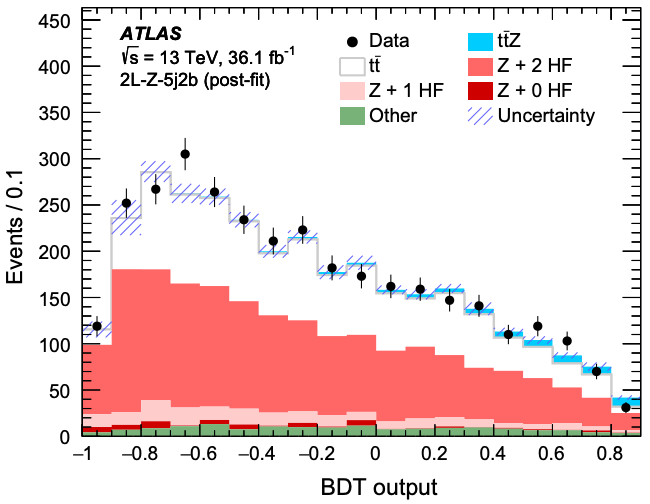

FIG. 10(b). The BDT distribution for the OS dilepton signal regions, (b) 2l-Z-5j2b. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons. The shaded band represents the total uncertainty. The last bin of each distribution contains the overflow.

[Back to contents](#contents)

<a id='BDT_6j1b'></a>

## BDT in 6j1b region

In order to separate signal from background, boosted decision trees (BDTs) are used. The BDTs are
constructed and trained against all the contributing backgrounds, using as input 15 variables for 2l-Z-6j1b. You can see the variables used in Table 11 of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

Choose variables for use in BDT

In [ ]:
BDT_6j1b_inputs = ['ptll','pt4_jet','pt6_jet','dRll','NJetPairsZMass','MjjMindR',
                   'CentrJet','dRjjave_jet','MaxMMindRlepb','HT_jet6','eta_ll','MWavg','pT1b'
                   ,'MuuPtOrd','H1' # try add these first
                   #,'pt5_jet','Nmbjj_top','MbbPtOrd','dRbb' # maybe you could also try add these later?
                  ] # variables to use in BDT

Select the data in the 6j1b Signal Region.

In [ ]:
# define function to select only events with leptons of same type, at least 6 jets and exactly 1 b-tagged jets
def select_6j1b_SR(channel, goodjet_n, bjet_n):
    if channel==143: return True # throw away if emu
    if goodjet_n<6: return True # throw away if not 5 jets
    if bjet_n!=1: return True # throw away if fewer than 2 b-tagged jets
    return False # keep this event if it gets to this stage

In [ ]:
data_6j1b_SR = {} # define empty dict
for s in samples_SR: # loop over samples to plot in Signal Regions
    fail = data_dict[s][ np.vectorize(select_6j1b_SR)(data_dict[s]['channel'], data_dict[s]['goodjet_n'],
                                                      data_dict[s]['bjet_n']) ].index # get events that fail the selection
    data_6j1b_SR[s] = data_dict[s].drop(fail).copy() # copy events that don't get dropped to a new dataframe

[Back to contents](#contents)

Organise data ready for BDT

In [ ]:
# for sklearn data is usually organised                                                                                                                                           
# into one 2D array of shape (n_samples x n_features)                                                                                                                             
# containing all the data and one array of categories                                                                                                                             
# of length n_samples  

all_MC = [] # define empty list that will contain all features for the MC
all_y = [] # define empty list that will contain labels whether an event in signal or background
for s in samples_SR: # loop over the different keys in the dictionary of dataframes
    if s=='data': continue # skip data for BDT training
    all_MC.append(data_6j1b_SR[s][BDT_6j1b_inputs]) # append the MC dataframe to the list containing all MC features
    if s==r'$t\bar{t}Z$': # only signal MC should pass this
        all_y.append(np.ones(data_6j1b_SR[s].shape[0])) # signal events are labelled with 1
    else: # only background MC should pass this
        all_y.append(np.zeros(data_6j1b_SR[s].shape[0])) # background events are labelled with 0
X = np.concatenate(all_MC) # concatenate the list of MC dataframes into a single 2D array of features, called X
y = np.concatenate(all_y) # concatenate the list of lables into a single 1D array of labels, called y

[Back to contents](#contents)

<a id='BDT_6j1b_train_test_split'></a>

### The Training and Testing split (6j1b)
One of the first things to do is split your data into a training and testing set. This will split your data into train-test sets: 75%-25%. It will also shuffle entries so you will not get the first 75% of <span style="color:red">X</span> for training and the last 25% for testing. This is particularly important in cases where you load all signal events first and then the background events.

Here we split our data into two independent samples. The split is to create a training and testing set. The first will be used for training the classifier and the second to evaluate its performance.

We don't want to test on events that we used to train on, this prevents overfitting to some subset of data so the network would be good for the test data but much worse at any *new* data it sees.

In [ ]:
from sklearn.model_selection import train_test_split

# make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=492 )

[Back to contents](#contents)

<a id='BDT_6j1b_training'></a>

### Training Decision Trees (6j1b)

We'll use SciKit Learn (sklearn) in this tutorial. Other possible tools include keras and pytorch. 

After instantiating our <span style="color:red">GradientBoostingClassifier</span>, call the <span style="color:red">fit()</span> method with the training sample as an argument. This will train the tree, now we are ready to evaluate the performance on the held out testing set.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # BoostType

bdt_6j1b = GradientBoostingClassifier()
bdt_6j1b.fit(X_train, y_train) # fit BDT to training set

The <span style="color:red">fit()</span> method returns the trained classifier. When printed out all the hyper-parameters are listed.

[Back to contents](#contents)

Apply the trained BDT to all Data and MC

In [ ]:
bdt_outputs = bdt_6j1b.decision_function(X) # apply bdt to all X
min_bdt_output = min(bdt_outputs) # get minimum BDT output score
max_bdt_output = max(bdt_outputs) # get maximum BDT output score

Map the BDT decision function to the range [-1,1]

In [ ]:
for s in samples_SR: # loop over samples
    X_s = data_6j1b_SR[s][BDT_6j1b_inputs] # get the BDT input features
    bdt_output_on_X_s = bdt_6j1b.decision_function(X_s) # get decision function for this sample
    mapped_bdt_output_on_X_s = (bdt_output_on_X_s-min_bdt_output)/(max_bdt_output-min_bdt_output)*2 - 1 # map to [-1,1]
    data_6j1b_SR[s]['BDT_6j1b_output'] = mapped_bdt_output_on_X_s # save BDT output

[Back to contents](#contents)

<a id='plot_6j1b_SR'></a>

## 6j1b Signal Region plot

Use the <span style="color:red">plot_data()</span> function defined [above](#plot_data) to compare Data with MC in BDT outputs in the 6j1b Signal Region. 

The Figure below shows the BDT output distribution in the signal
region 2l-Z-6j1b.

In [ ]:
plot_data(data_6j1b_SR, samples_to_plot=samples_SR, x_variable='BDT_6j1b_output',
          region_label='2L-Z-6j1b')

Compare this with Figure 10(a) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

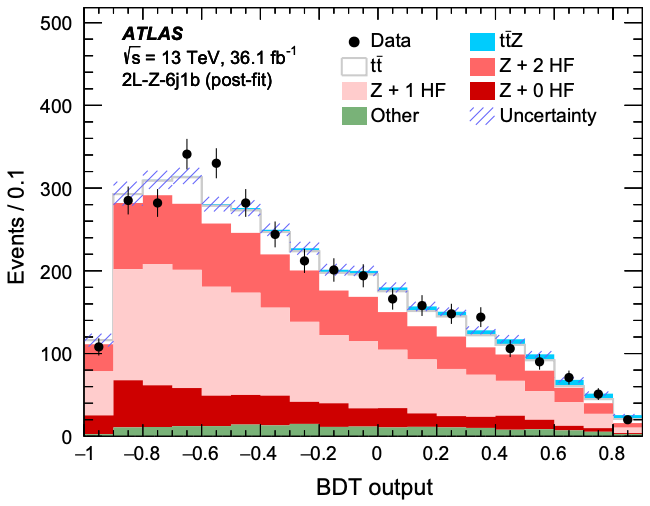

FIG. 10(a). The BDT distribution for the OS dilepton signal regions, (a) 2l-Z-6j1b. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons. The shaded band represents the total uncertainty. The last bin of each distribution contains the overflow.

[Back to contents](#contents)

<a id='data_CR'></a>

## Control Region plots

Samples containing events that pass all selections in the Control Regions.

In [ ]:
samples_CR = {

    'data': {
        'list' : ['data_A','data_B','data_C','data_D']
    },
    
    'Other' : {
        'color' : "#79b278" # green                                                                                                                                                                 
    },  
    
    r'$t\bar{t}$' : {
        'color' : "#f8f8f8" # almost white
    },                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
    
}

<a id='plot_6j2b_CR'></a>

## 6j2b Control Region plot

Select the data in the 6j2b Control Region.

In [ ]:
# define function to select only events with leptons of different type, at least 6 jets and at least 2 b-tagged jets
def select_6j2b_CR(channel, goodjet_n, bjet_n):
    if channel!=143: return True # throw away if not emu
    if goodjet_n<6: return True # throw away if fewer than 6 jets
    if bjet_n<2: return True # throw away if fewer than 2 b-tagged jets
    return False # keep this event if it gets to this stage

In [ ]:
data_6j2b_CR = {} # define empty dict
for s in samples: # loop over samples
    fail = data_dict[s][ np.vectorize(select_6j2b_CR)(data_dict[s]['channel'], data_dict[s]['goodjet_n'],
                                                      data_dict[s]['bjet_n']) ].index # get events that fail the selection
    data_6j2b_CR[s] = data_dict[s].drop(fail).copy() # copy events that don't get dropped to new dataframe

[Back to contents](#contents)

Append Z and ttZ to Other as this is how the Control Region is plotted.

In [ ]:
data_6j2b_CR['Other'] = data_6j2b_CR['Other'].append(data_6j2b_CR['Z']) # append Z events to Other
data_6j2b_CR['Other'] = data_6j2b_CR['Other'].append(data_6j2b_CR[r'$t\bar{t}Z$']) # append ttZ events to Other

[Back to contents](#contents)

Map the BDT decision function to the range [-1,1]

In [ ]:
for s in samples_CR: # loop over samples
    X_s = data_6j2b_CR[s][BDT_6j2b_inputs] # get the BDT input features
    bdt_output_on_X_s = bdt_6j2b.decision_function(X_s) # get decision function for this sample
    mapped_bdt_output_on_X_s = (bdt_output_on_X_s-min_bdt_output)/(max_bdt_output-min_bdt_output)*2 - 1 # map to [-1,1]
    data_6j2b_CR[s]['BDT_6j2b_output'] = mapped_bdt_output_on_X_s # save BDT output

[Back to contents](#contents)

Use the <span style="color:red">plot_data()</span> function defined [above](#plot_data) to compare Data with MC in BDT outputs in the 6j2b Region. 

In [ ]:
plot_data(data_6j2b_CR, samples_to_plot=samples_CR, x_variable='BDT_6j2b_output',
          region_label=r'$e\mu$-Z-6j2b-CR')

Compare this with Figure 1(c) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

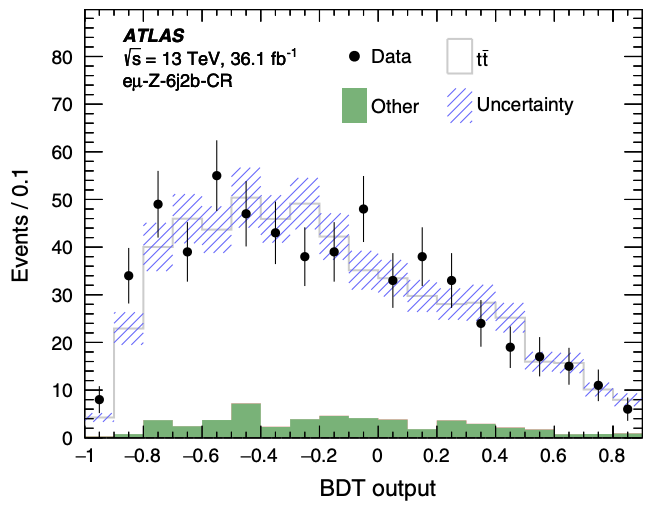

FIG. 1(c). The BDT distribution for the $t\bar{t}$ control regions (c) 2l-Z-6j2b. The shaded band represents the
total uncertainty. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons, including the $t\bar{t}Z$ process, whose contribution is negligible.

[Back to contents](#contents)

<a id='plot_5j2b_CR'></a>

## 5j2b Control Region plot

Select the data in the 5j2b Control Region.

In [ ]:
# define function to select only events with leptons of different type, at least 6 jets and at least 2 b-tagged jets
def select_5j2b_CR(channel, goodjet_n, bjet_n):
    if channel!=143: return True # throw away if not emu
    if goodjet_n!=5: return True # throw away if fewer than 6 jets
    if bjet_n<2: return True # throw away if fewer than 2 b-tagged jets
    return False # keep this event if it gets to this stage

In [ ]:
data_5j2b_CR = {} # define empty dict
for s in samples: # loop over samples
    fail = data_dict[s][ np.vectorize(select_5j2b_CR)(data_dict[s]['channel'], data_dict[s]['goodjet_n'],
                                                      data_dict[s]['bjet_n']) ].index # get events that fail the selection
    data_5j2b_CR[s] = data_dict[s].drop(fail).copy() # copy events that don't get dropped to new dataframe

[Back to contents](#contents)

Append Z and ttZ to Other as this is how the Control Region is plotted.

In [ ]:
data_5j2b_CR['Other'] = data_5j2b_CR['Other'].append(data_5j2b_CR['Z']) # append Z events to Other
data_5j2b_CR['Other'] = data_5j2b_CR['Other'].append(data_5j2b_CR[r'$t\bar{t}Z$']) # append ttZ events to Other

[Back to contents](#contents)

Map the BDT decision function to the range [-1,1]

In [ ]:
for s in samples_CR: # loop over samples
    X_s = data_5j2b_CR[s][BDT_5j2b_inputs] # get the BDT input features
    bdt_output_on_X_s = bdt_5j2b.decision_function(X_s) # get decision function for this sample
    mapped_bdt_output_on_X_s = (bdt_output_on_X_s-min_bdt_output)/(max_bdt_output-min_bdt_output)*2 - 1 # map to [-1,1]
    data_5j2b_CR[s]['BDT_5j2b_output'] = mapped_bdt_output_on_X_s # save BDT output

[Back to contents](#contents)

Use the <span style="color:red">plot_data()</span> function defined [above](#plot_data) to compare Data with MC in BDT outputs in the 5j2b Region. 

In [ ]:
plot_data(data_5j2b_CR, samples_to_plot=samples_CR, x_variable='BDT_5j2b_output',
          region_label=r'$e\mu$-Z-5j2b-CR')

Compare this with Figure 1(b) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

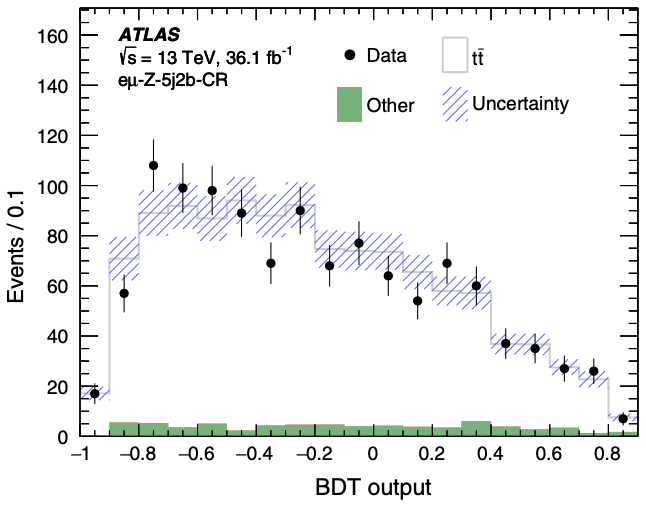

FIG. 1(b). The BDT distribution for the $t\bar{t}$ control regions (b) 2l-Z-5j2b. The shaded band represents the
total uncertainty. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons, including the $t\bar{t}Z$ process, whose contribution is negligible.

[Back to contents](#contents)

<a id='plot_6j1b_CR'></a>

## 6j1b Control Region plot

Select the data in the 6j1b Control Region.

In [ ]:
# define function to select only events with leptons of different type, at least 6 jets and at least 2 b-tagged jets
def select_6j1b_CR(channel, goodjet_n, bjet_n):
    if channel!=143: return True # throw away if not emu
    if goodjet_n<6: return True # throw away if fewer than 6 jets
    if bjet_n!=1: return True # throw away if fewer than 2 b-tagged jets
    return False # keep this event if it gets to this stage

In [ ]:
data_6j1b_CR = {} # define empty dict
for s in samples: # loop over samples
    fail = data_dict[s][ np.vectorize(select_6j1b_CR)(data_dict[s]['channel'], data_dict[s]['goodjet_n'],
                                                      data_dict[s]['bjet_n']) ].index # get events that fail the selection
    data_6j1b_CR[s] = data_dict[s].drop(fail).copy() # copy events that don't get dropped to new dataframe

[Back to contents](#contents)

Append Z and ttZ to Other as this is how the Control Region is plotted.

In [ ]:
data_6j1b_CR['Other'] = data_6j1b_CR['Other'].append(data_6j1b_CR['Z']) # append Z events to Other
data_6j1b_CR['Other'] = data_6j1b_CR['Other'].append(data_6j1b_CR[r'$t\bar{t}Z$']) # append ttZ events to Other

[Back to contents](#contents)

Map the BDT decision function to the range [-1,1]

In [ ]:
for s in samples_CR: # loop over samples
    X_s = data_6j1b_CR[s][BDT_6j1b_inputs] # get the BDT input features
    bdt_output_on_X_s = bdt_6j1b.decision_function(X_s) # get decision function for this sample
    mapped_bdt_output_on_X_s = (bdt_output_on_X_s-min_bdt_output)/(max_bdt_output-min_bdt_output)*2 - 1 # map to [-1,1]
    data_6j1b_CR[s]['BDT_6j1b_output'] = mapped_bdt_output_on_X_s # save BDT output

[Back to contents](#contents)

Use the <span style="color:red">plot_data()</span> function defined [above](#plot_data) to compare Data with MC in BDT outputs in the 6j1b Region. 

In [ ]:
plot_data(data_6j1b_CR, samples_to_plot=samples_CR, x_variable='BDT_6j1b_output',
          region_label=r'$e\mu$-Z-6j1b-CR')

Compare this with Figure 1(a) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

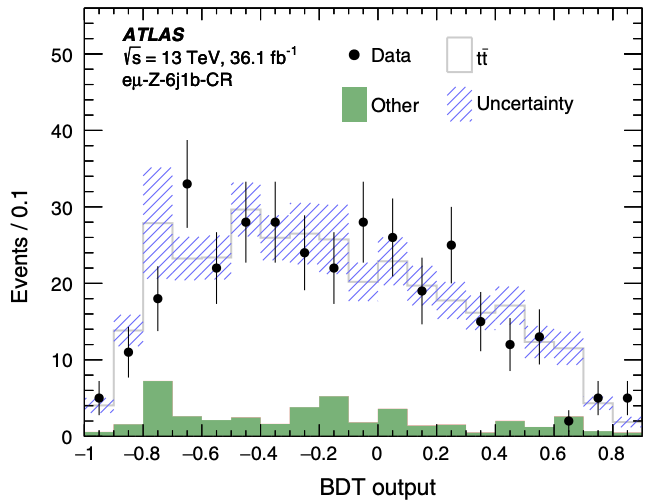

FIG. 1(a). The BDT distribution for the $t\bar{t}$ control regions (a) 2l-Z-6j1b. The shaded band represents the
total uncertainty. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons, including the $t\bar{t}Z$ process, whose contribution is negligible.

[Back to contents](#contents)

<a id='data_driven'></a>

## Data-driven ttbar estimation

We've so far used a Monte-Carlo method to estimate the $t\bar{t}$ background in the OS dilepton signal regions. But we can do better.

A data-driven method is used to estimate the $t\bar{t}$ background in the OS dilepton signal regions. Control regions
are defined which are identical to the signal regions, except
that the requirement of two leptons with the same flavor
and opposite sign is replaced by the requirement
of two leptons with different flavors and opposite sign.
In this manner, three regions enriched in $t\bar{t}$ background
are obtained. The number of $t\bar{t}$ events in each sameflavor dilepton region is estimated from corresponding opposite-flavor regions, corrected for non-$t\bar{t}$ backgrounds.

This procedure is applied to each bin of the
distribution under consideration.

In [ ]:
def data_driven(data_SR=data_6j2b_SR, data_CR=data_6j2b_CR, x_variable='BDT_6j2b_output'):
    histogrammed_data = {} # dictionary to hold histogrammed data
    histogrammed_data_err = {} # dictionary to hold errors on histogrammed data

    N_tt_ll = sum(data_SR[r'$t\bar{t}$']['totalWeight']) # number of ttbar events with opposite-sign selection
    N_tt_emu = sum(data_CR[r'$t\bar{t}$']['totalWeight']) # number of ttbar events with emu selection
    C_tt = N_tt_ll/N_tt_emu # correction factor between opposite-sign selection and emu selection
    
    weights_squared = sum(data_SR[r'$t\bar{t}$']['totalWeight']**2) # number of ttbar events with opposite-sign selection
    N_tt_ll_err = np.sqrt(weights_squared)
    weights_squared = sum(data_CR[r'$t\bar{t}$']['totalWeight']**2) # number of ttbar events with opposite-sign selection
    N_tt_emu_err = np.sqrt(weights_squared)
    C_tt_err = C_tt*np.sqrt((N_tt_ll_err/N_tt_ll)**2 + (N_tt_emu_err/N_tt_emu)**2) # error propagation
    
    bin_edges = np.arange(start=-1, # The interval includes this value
                          stop=1+0.1, # The interval doesn't include this value
                          step=0.1 ) # Spacing between values
    bin_centres = np.arange(start=-1+0.1/2, # The interval includes this value
                            stop=1+0.1/2, # The interval doesn't include this value
                            step=0.1 ) # Spacing between values

    # histogram the data in the emu selection region
    data_x,_ = np.histogram(data_CR['data'][x_variable], bins=bin_edges)
    data_err = np.sqrt(data_x)

    # histogram the non-ttbar background in the emu selection region
    non_tt_background_x,_ = np.histogram(data_CR['Other'][x_variable], bins=bin_edges, weights=data_CR['Other'].totalWeight)
    weights_squared,_ = np.histogram(data_CR['Other'][x_variable], bins=bin_edges,
                                     weights=data_CR['Other'].totalWeight**2)
    non_tt_background_err = np.sqrt(weights_squared)

    non_corrected_tt = data_x-non_tt_background_x # data-driven ttbar in emu selection region
    corrected_tt = C_tt*non_corrected_tt # data-driven ttbar in ll selection region
    histogrammed_data[r'$t\bar{t}$'] = corrected_tt # put in histogrammed_data
    
    # error propagation on corrected_tt = C*tt(data_x - non_tt_background_x)
    histogrammed_data_err[r'$t\bar{t}$'] = np.sqrt((non_corrected_tt*C_tt_err)**2 + (C_tt*data_err)**2 + (C_tt*non_tt_background_err)**2)

    for s in samples_SR: # loop over samples
        if s!=r'$t\bar{t}$': # everything other than ttbar
            if s=='data': # histogram for data
                histogrammed_data[s],_ = np.histogram(data_SR[s][x_variable], bins=bin_edges)
            else: # histogram for MC other than ttbar
                histogrammed_data[s],_ = np.histogram(data_SR[s][x_variable], bins=bin_edges,
                                                                weights=data_SR[s].totalWeight)
                weights_squared,_ = np.histogram(data_SR[s][x_variable], bins=bin_edges,
                                                                weights=data_SR[s].totalWeight**2)
                histogrammed_data_err[s] = np.sqrt(weights_squared)
    return histogrammed_data,histogrammed_data_err


[Back to contents](#contents)

<a id='plot_data_from_hist'></a>

## Function to plot Data and MC from histograms

In [ ]:
def plot_data_from_hist(data, MC_errors, samples_to_plot=samples_SR, 
                        x_variable='BDT_6j2b_output', region_label='2L-Z-6j2b'):
    
    # *******************
    # general definitions (shouldn't need to change)
      
    bin_edges = np.arange(start=-1, # The interval includes this value
                 stop=1+0.1, # The interval doesn't include this value
                 step=0.1 ) # Spacing between values
    bin_centres = np.arange(start=-1+0.1/2, # The interval includes this value
                        stop=1+0.1/2, # The interval doesn't include this value
                        step=0.1 ) # Spacing between values
    
    main_axes = plt.gca() # get current axes

    mc_bottom = np.zeros(len(bin_centres)) # array to hold the bottom of the MC stack
    mc_stat_err_squared = np.zeros(len(bin_centres)) # define array to hold the MC statistical uncertainties
    for s in samples_to_plot: # loop over samples
        if s!='data': # if not data
            mc_height = main_axes.bar(bin_centres, data[s], 
                                          width=0.1, bottom=mc_bottom, color=samples_to_plot[s]['color'], 
                                          label=s )
            mc_bottom += data[s] # add this MC to the MC stack
            mc_stat_err_squared = np.add(mc_stat_err_squared, MC_errors[s]**2) # add weights_squared for s 

    mc_x_tot = mc_bottom # stacked background MC y-axis value
    mc_x_err = np.sqrt( mc_stat_err_squared ) # statistical error on the MC bars

    # histogram the data
    data_x = data['data'] 

    # statistical error on the data
    data_x_errors = np.sqrt(data_x)

    # plot the data points
    main_axes.errorbar(x=bin_centres, 
                       y=data_x, 
                       yerr=data_x_errors,
                       fmt='ko', # 'k' means black and 'o' is for circles 
                       label='Data')

    # plot the statistical uncertainty
    main_axes.bar(bin_centres, # x
                  2*mc_x_err, # heights
                  alpha=0.5, # half transparency
                  bottom=mc_x_tot-mc_x_err, color='none', 
                  hatch="////", width=0.1, label='Stat. Unc.' )

    # set the x-limit of the main axes
    main_axes.set_xlim( left=-1, right=1 ) 

    # separation of x axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          right=True ) # draw ticks on right axis

    # x-axis label
    main_axes.set_xlabel(x_variable, fontsize=13)

    # y-axis label
    main_axes.set_ylabel('Events / 0.1')

    # force y-axis ticks to be integers
    main_axes.yaxis.set_major_locator(MaxNLocator(integer=True))

    # set y-axis limits for main axes
    main_axes.set_ylim(bottom=0,
                       top=np.amax(data_x)+np.sqrt(np.amax(data_x))*5 )

    # add minor ticks on y-axis for main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

    # Add text 'ATLAS Open Data' on plot
    plt.text(0.05, # x
             0.92, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 

    # Add text 'for education' on plot
    plt.text(0.05, # x
             0.87, # y
             'for education', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             style='italic',
             fontsize=8 ) 

    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.05, # x
             0.81, # y
             '$\sqrt{s}$=13 TeV, '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # Add a label for the analysis region
    plt.text(0.05, # x
             0.75, # y
             region_label, # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # draw the legend
    main_axes.legend(ncol=2, # number of columns
                     frameon=False ) # no box around the legend 


    

[Back to contents](#contents)

<a id='6j2b_data_driven'></a>

## 6j2b Signal Region plot with data-driven $t\bar{t}$

Use the <span style="color:red">data_driven()</span> function defined [above](#data_driven) to get the histograms of Data and MC in the 6j2b Signal Region.

In [ ]:
data_6j2b_SR_hists, data_6j2b_SR_errors = data_driven(data_SR=data_6j2b_SR, data_CR=data_6j2b_CR, 
                                                      x_variable='BDT_6j2b_output')

Use the <span style="color:red">plot_data_from_hist()</span> function defined [above](#plot_data_from_hist) to compare Data with MC in BDT outputs in the 6j2b Signal Region. 

In [ ]:
plot_data_from_hist(data=data_6j2b_SR_hists, MC_errors=data_6j2b_SR_errors, samples_to_plot=samples_SR, 
                    x_variable='BDT_6j2b_output', region_label='2L-Z-6j2b')

Compare this with Figure 10(c) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

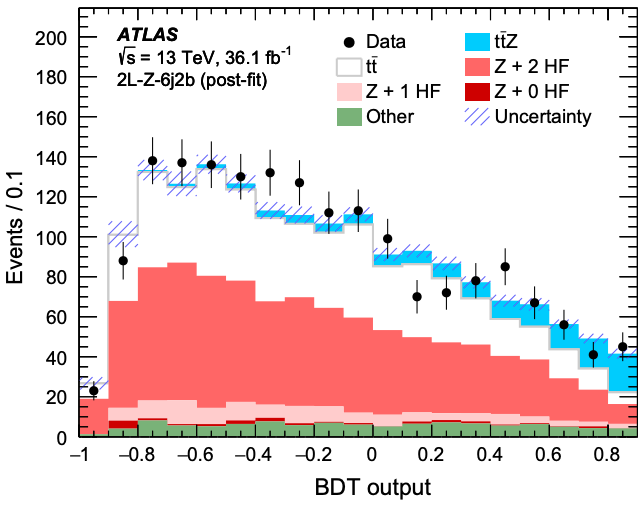

FIG. 10(c). The BDT distribution for the OS dilepton signal regions, (c) 2l-Z-6j2b. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons. The shaded band represents the total uncertainty. The last bin of each distribution contains the overflow.

[Back to contents](#contents)

<a id='5j2b_data_driven'></a>

## 5j2b Signal Region plot with data-driven $t\bar{t}$

Use the <span style="color:red">data_driven()</span> function defined [above](#data_driven) to get the histograms of Data and MC in the 5j2b Signal Region.

In [ ]:
data_5j2b_SR_hists, data_5j2b_SR_errors = data_driven(data_SR=data_5j2b_SR, data_CR=data_5j2b_CR, 
                                                      x_variable='BDT_5j2b_output')

Use the <span style="color:red">plot_data_from_hist()</span> function defined [above](#plot_data_from_hist) to compare Data with MC in BDT outputs in the 5j2b Signal Region. 

In [ ]:
plot_data_from_hist(data=data_5j2b_SR_hists, MC_errors=data_5j2b_SR_errors, samples_to_plot=samples_SR, 
                    x_variable='BDT_5j2b_output', region_label='2L-Z-5j2b')

Compare this with Figure 10(b) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

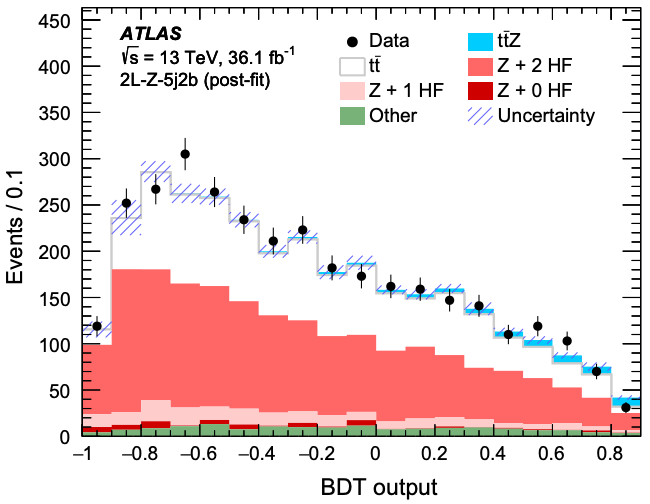

FIG. 10(b). The BDT distribution for the OS dilepton signal regions, (b) 2l-Z-5j2b. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons. The shaded band represents the total uncertainty. The last bin of each distribution contains the overflow.

[Back to contents](#contents)

<a id='6j1b_data_driven'></a>

## 6j1b Signal Region plot with data-driven $t\bar{t}$

Use the <span style="color:red">data_driven()</span> function defined [above](#data_driven) to get the histograms of Data and MC in the 6j1b Signal Region.

In [ ]:
data_6j1b_SR_hists, data_6j1b_SR_errors = data_driven(data_SR=data_6j1b_SR, data_CR=data_6j1b_CR, 
                                                      x_variable='BDT_6j1b_output')

Use the <span style="color:red">plot_data_from_hist()</span> function defined [above](#plot_data_from_hist) to compare Data with MC in BDT outputs in the 6j1b Signal Region. 

In [ ]:
plot_data_from_hist(data=data_6j1b_SR_hists, MC_errors=data_6j1b_SR_errors, samples_to_plot=samples_SR, 
                    x_variable='BDT_6j1b_output', region_label='2L-Z-6j1b')

Compare this with Figure 10(a) of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

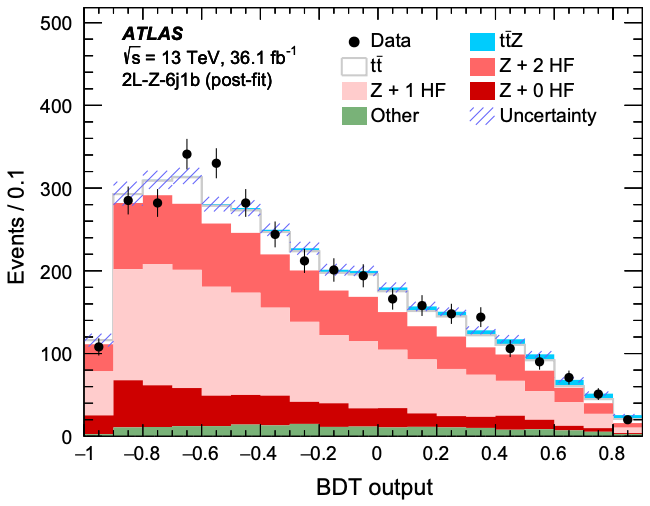

FIG. 10(a). The BDT distribution for the OS dilepton signal regions, (a) 2l-Z-6j1b. The “Other” background contains SM processes with small cross sections producing two opposite-sign prompt
leptons. The shaded band represents the total uncertainty. The last bin of each distribution contains the overflow.

[Back to contents](#contents)

<a id='BDT_feature_importances'></a>

## BDT feature importances

First, we order the input variables by feature importances.

In [ ]:
feature_importance_dict_6j2b = {} # dictionary to hold features and their importance
for i in range(len(BDT_6j2b_inputs)): # loop over BDt input variables
    feature_importance_dict_6j2b[BDT_6j2b_inputs[i]] = bdt_6j2b.feature_importances_[i] # get feature importance from bdt
    
# sort the feature importance dict by feature importance
sorted_feature_importance_dict_6j2b = { k:v for k,v in reversed(sorted(feature_importance_dict_6j2b.items(), 
                                                                       key=lambda item: item[1])) }
sorted_feature_importance_dict_6j2b


In [ ]:
feature_importance_dict_5j2b = {} # dictionary to hold features and their importance
for i in range(len(BDT_5j2b_inputs)): # loop over BDt input variables
    feature_importance_dict_5j2b[BDT_5j2b_inputs[i]] = bdt_5j2b.feature_importances_[i] # get feature importance from bdt
    
# sort the feature importance dict by feature importance
sorted_feature_importance_dict_5j2b = { k:v for k,v in reversed(sorted(feature_importance_dict_5j2b.items(), 
                                                                       key=lambda item: item[1])) }
sorted_feature_importance_dict_5j2b


In [ ]:
feature_importance_dict_6j1b = {} # dictionary to hold features and their importance
for i in range(len(BDT_6j1b_inputs)): # loop over BDt input variables
    feature_importance_dict_6j1b[BDT_6j1b_inputs[i]] = bdt_6j1b.feature_importances_[i] # get feature importance from bdt
    
# sort the feature importance dict by feature importance
sorted_feature_importance_dict_6j1b = { k:v for k,v in reversed(sorted(feature_importance_dict_6j1b.items(), 
                                                                       key=lambda item: item[1])) }
sorted_feature_importance_dict_6j1b


[Back to contents](#contents)

Next, we write a description of each BDT variable in words.

In [ ]:
feature_descriptions = {'ptll':'$p_T$ of the lepton pair',
                        'pt4_jet':'$p_T$ of the 4th jet',
                        'pt5_jet':'$p_T$ of the 5th jet',
                        'pt6_jet':'$p_T$ of the 6th jet',
                        'dRll':'$\Delta R_{\eta}$ between the two leptons',
                        'NJetPairsZMass':'Number of jet pairs with mass within a window of 30 GeV around 85 GeV',
                        'Nmbjj_top':'Number of top-quark candidates',
                        'MjjMindR':'Invariant mass of the two jets with the smallest $\Delta R_{\eta}$',
                        'MuuPtOrd':'Invariant mass of the two untagged jets with the highest $p_T$',
                        'MbbPtOrd':'Invariant mass of the two jets with the highest value of the b-tagging discriminant',
                        'CentrJet':'Scalar sum of $p_T$ divided by the sum of energy of all jets',
                        'dRjjave_jet':'Average $\Delta R_{\eta}$ of all jet pairs',
                        'MaxMMindRlepb':'Maximum invariant mass of a lepton and the b-tagged jet with the smallest $\Delta R_{\eta}$',
                        'H1':'First Fox–Wolfram moment built from jets and leptons',
                        'HT_jet6':'Sum of jet $p_T$, using up to six jets',
                        'eta_ll':'$\eta$ of dilepton system',
                        'MWavg':'Sum of the two closest two-jet invariant masses from jjj1 and jjj2 divided by two',
                        'dRbb':'$\Delta R_{\eta}$ between two jets with the highest value of the b-tagging discriminant in the event',
                        'pT1b':'$p_T$ of the b-tagged jet with the highest $p_T$'}

[Back to contents](#contents)

Next, we print the BDT input variables ranked by feature importances

If there are any features not used in the BDT for a particular region, print a dash.

In [ ]:
sorted_feature_importance_keys_6j1b = list(sorted_feature_importance_dict_6j1b.keys())
sorted_feature_importance_keys_5j2b = list(sorted_feature_importance_dict_5j2b.keys())
sorted_feature_importance_keys_6j2b = list(sorted_feature_importance_dict_6j2b.keys())
for k,v in feature_descriptions.items():
    print('|',v,'|', end = '')
    if k in sorted_feature_importance_keys_6j1b: print(sorted_feature_importance_keys_6j1b.index(k)+1, end = '')
    else: print('-', end = '')
    print('|', end = '')
    if k in sorted_feature_importance_keys_5j2b: print(sorted_feature_importance_keys_5j2b.index(k)+1, end = '')
    else: print('-', end = '')
    print('|', end = '')
    if k in sorted_feature_importance_keys_6j2b: print(sorted_feature_importance_keys_6j2b.index(k)+1, end = '')
    else: print('-', end = '')
    print('|')


 The details of the variables used are given in the Table below.

| Definition | 6j1b | 5j2b | 6j2b |
|------|------|------|------|
| $p_T$ of the lepton pair |15|14|15|
| $p_T$ of the 4th jet |5|1|8|
| $p_T$ of the 5th jet |-|8|-|
| $p_T$ of the 6th jet |2|-|2|
| $\Delta R_{\eta}$ between the two leptons |6|4|7|
| Number of jet pairs with mass within a window of 30 GeV around 85 GeV |1|2|3|
| Number of top-quark candidates |-|-|1|
| Invariant mass of the two jets with the smallest $\Delta R_{\eta}$ |13|10|17|
| Invariant mass of the two untagged jets with the highest $p_T$ |9|11|-|
| Invariant mass of the two jets with the highest value of the b-tagging discriminant |-|5|4|
| Scalar sum of $p_T$ divided by the sum of energy of all jets |14|13|16|
| Average $\Delta R_{\eta}$ of all jet pairs |11|3|10|
| Maximum invariant mass of a lepton and the b-tagged jet with the smallest $\Delta R_{\eta}$ |10|-|13|
| First Fox–Wolfram moment built from jets and leptons |12|12|14|
| Sum of jet $p_T$, using up to six jets |4|6|5|
| $\eta$ of dilepton system |3|9|9|
| Sum of the two closest two-jet invariant masses from jjj1 and jjj2 divided by two |7|-|11|
| $\Delta R_{\eta}$ between two jets with the highest value of the b-tagging discriminant in the event |-|7|6|
| $p_T$ of the b-tagged jet with the highest $p_T$ |8|-|12|

Table: The definitions and ranking of input variables for the BDT in the OS dilepton analysis. Jets and leptons are ordered in descending order of $p_T$. Only the first eight jets are considered when calculating the input variables.

The variables with the largest discriminative power are found to be:
* $p_T$ of the 6th jet
* $p_T$ of the 4th jet
* Number of jet pairs with mass within a window of 30 GeV around 85 GeV

This can be compared to Table 11 of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009)

| Definition | 6j1b | 5j2b | 6j2b |
|------|------|------|------|
| $p_T$ of the lepton pair |8|11|8|
| $p_T$ of the 4th jet |6|12|6|
| $p_T$ of the 5th jet |-|14|-|
| $p_T$ of the 6th jet |9|-|11|
| $\Delta R_{\eta}$ between the two leptons |7|8|12|
| Number of jet pairs with mass within a window of 30 GeV around 85 GeV |4|6|4|
| Number of top-quark candidates |-|-|17|
| Invariant mass of the two jets with the smallest $\Delta R_{\eta}$ |13|7|14|
| Invariant mass of the two untagged jets with the highest $p_T$ |15|13|-|
| Invariant mass of the two jets with the highest value of the b-tagging discriminant |-|10|9|
| Scalar sum of $p_T$ divided by the sum of energy of all jets |2|1|2|
| Average $\Delta R_{\eta}$ of all jet pairs |5|4|5|
| Maximum invariant mass of a lepton and the b-tagged jet with the smallest $\Delta R_{\eta}$ |14|-|13|
| First Fox–Wolfram moment built from jets and leptons |3|2|1|
| Sum of jet $p_T$, using up to six jets |12|5|10|
| $\eta$ of dilepton system |1|3|3|
| Sum of the two closest two-jet invariant masses from jjj1 and jjj2 divided by two |10|-|15|
| $\Delta R_{\eta}$ between two jets with the highest value of the b-tagging discriminant in the event |-|9|7|
| $p_T$ of the b-tagged jet with the highest $p_T$ |11|-|16|

Table 11: The definitions and ranking of input variables for the BDT in the OS dilepton analysis. Jets and leptons are ordered in descending order of $p_T$. Only the first eight jets are considered when calculating the input variables.

The variables with the largest discriminative power are found to be:
* $\eta$ of dilepton system
* Scalar sum of $p_T$ divided by the sum of energy of all jets
* First Fox–Wolfram moment built from jets and leptons

[Back to contents](#contents)

Putting everything into a BDT means we only have 1 variable to optimise. The <span style="color:blue">signal</span> and <span style="color:red">background</span> distributions are separated much better when looking at BDT output, compared to individual variables. Cutting on BDT output also achieves much higher S/B values than on individual variables.

BDTs can achieve better S/B ratios because they find correlations in many dimensions that will give better signal/background classification.

Hopefully you've enjoyed this discussion on optimising for <span style="color:blue">signal</span> to <span style="color:red">background</span> ratio, and in particular how a BDT can be used to facilitate this.

<a id='going_further'></a>

## Going further

If you want to go further, there are a number of things you could try: 
* **Plot BDT output in 5j2b Signal Region**. Complete the code cells in '[Training Decision Trees (5j2b)](#BDT_5j2b_training)' and '[5j2b Signal Region plot](#plot_5j2b_SR)' to get a plot of BDT output distribution in the 5j2b Signal Region. Run these cells to see the plots. You may find the code cells in '[Training Decision Trees (6j2b)](#BDT_6j2b_training)' and '[6j2b Signal Region plot](#plot_6j2b_SR)' helpful.
* **Plot BDT output in 6j1b Signal Region**. Complete the code cells in '[Training Decision Trees (6j1b)](#BDT_5j2b_training)' and '[6j1b Signal Region plot](#plot_6j1b_SR)' to get a plot of BDT output distribution in the 6j1b Signal Region. Run these cells to see the plots. You may find the code cells in '[Training Decision Trees (6j2b)](#BDT_6j2b_training)' and '[6j2b Signal Region plot](#plot_6j2b_SR)' helpful.
* **Plot BDT output in 5j2b Control Region**. Complete the code cells in '[5j2b Control Region plot](#plot_5j2b_CR)' to get a plot of BDT output distribution in the 5j2b Control Region. Run these cells to see the plots. You may find the code cells in '[6j2b Control Region plot](#plot_6j2b_CR)' helpful.
* **Plot BDT output in 6j1b Control Region**. Complete the code cells in '[6j1b Control Region plot](#plot_6j1b_CR)' to get a plot of BDT output distribution in the 6j1b Control Region. Run these cells to see the plots. You may find the code cells in '[6j2b Control Region plot](#plot_6j2b_CR)' helpful.
* **Plot BDT output in 5j2b Signal Region with data-driven $t\bar{t}$**. Complete the code cells in '[5j2b Signal Region plot with data-driven $t\bar{t}$](#5j2b_data_driven)' to get a plot of BDT output distribution in the 5j2b Signal Region. Run these cells to see the plots. You may find the code cells in '[6j2b Signal Region plot with data-driven $t\bar{t}$](#6j2b_data_driven)' helpful.
* **Plot BDT output in 6j1b Signal Region with data-driven $t\bar{t}$**. Complete the code cells in '[6j1b Signal Region plot with data-driven $t\bar{t}$](#6j1b_data_driven)' to get a plot of BDT output distribution in the 6j1b Signal Region. Run these cells to see the plots. You may find the code cells in '[6j2b Signal Region plot with data-driven $t\bar{t}$](#6j2b_data_driven)' helpful.
* **Add variables into the BDTs**. Start by adding them in the list of '[BDT_6j2b_inputs](#BDT_6j2b)' and/or '[BDT_5j2b_inputs](#BDT_5j2b)' and/or '[BDT_6j1b_inputs](#BDT_6j1b)'. Then uncomment the commented variables in '[Can we process the data yet?!](#load_data)' (lines 116-125). Cell -> Run All Below. See how things look with all variables added.
* **Add stricter requirements on good leptons**. Uncomment the lines in '[Can we process the data yet?!](#load_data)' regarding *lep_z0* (lines 14, 61, 148). A Ctrl-f search for *lep_z0* might help. Uncomment the lines in '[the select_leptons function](#select_leptons)' regarding *lep_z0* (longitudinal impact parameter) (lines 4 and 32-35). Cell -> Run All Below. See how things look with this selection added.
* **Add stricter requirements on good jets**. Uncomment line 34 in '[Can we process the data yet?!](#load_data)'. Uncomment the line for *jet_eta* in '[the select_jets function](#good_jets)' (line 2). Change the selection for jets with $p_T$ below 60 GeV to include a selection on jet_eta in '[the select_jets function](#good_jets)' (line 8/9). Cell -> Run All Below. See how things look with this selection added.
* **Add a b-tagging scale factor**. The weight of a simulated event is usually given by $xsec\_weight*mcWeight*scaleFactor\_PILEUP*scaleFactor\_ELE*scaleFactor\_MUON*scaleFactor\_LepTRIGGER$. Since we're asking for b-tagged jets, we should also include a scale factor for b-tagging in this multiplication. Uncomment *scaleFactor_BTAG* in line 20 and 136 of '[Can we process the data yet?!](#load_data)'. Uncomment scaleFactor_BTAG in [the calc_weight function](#calc_weight).  Cell -> Run All Below. See how things look with this scale factor added.
* **Add data_A**. Uncomment *data_A* in '[Samples to process](#samples_to_process)'. Change *lumi* to 10 in '[Lumi, fraction, file path](#fraction)'. Cell -> Run All Below. See how things look with *data_A* added.
* **Increase the fraction of all events** that are processed in '[Lumi, fraction, file path](#fraction)' (maximum 1). Cell -> Run All Below. See how things look with fraction increased.
* **Increase the fraction of simulated events** that are processed in '[Lumi, fraction, file path](#fraction)' by increasing *MC_to_data_ratio* (maximum 1). Cell -> Run All Below. See how things look with this ratio increased.
* **Add in the other background samples** in '[Samples to process](#samples_to_process)' by uncommenting the files that aren't currently being processed. Cell -> Run All Below. See how things look with all added. Maybe look into which ones don't contain any events that pass our requirements, so that you won't have to process them again.
* **Modify some BDT hyper-parameters** in '[Training Decision Trees (6j2b)](#BDT_6j2b_training)' and/or '[Training Decision Trees (5j2b)](#BDT_5j2b_training)' and/or '[Training Decision Trees (6j1b)](#BDT_6j1b_training)'. Cell -> Run All Below. You may find the [sklearn documentation on GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) helpful.

With each change, keep an eye on the BDT output distributions in each region.

[Back to contents](#contents)